# Notebook for integrating methylation and genetic data  
5x filtering

In [26]:
library(spaa) #for correlating distance matrices
library(dplyr) #distinct function


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [1]:
SUFFIX = '../analyses/2bRAD/Inputs/HCSS_Afilt32m70_01'
POP = '../analyses/2bRAD/PopGen/HCSS_Afilt32m70_01'
INPUT = '../analyses/2bRAD/Inputs/'

In [1]:
#function to run bash commands cleanly
js <- function(shell_command){
    cat(system(shell_command, intern=TRUE), sep='\n')}

# Correlate genetic and epigenetic distances

### For all filtered MBD sites

In [3]:
js("head ../analyses/methylation-filtered/dist.manhat.csv")

"SeqNum.row","SeqNum.col","dist.manh","SampNum.row","SampNum.col"
1,1,0,"hc1_2","hc1_2"
1,15,2627987.64277046,"ss3_15","hc1_2"
1,3,2759915.80320949,"hc2_15","hc1_2"
1,17,2729476.30606038,"ss3_20","hc1_2"
1,4,2673543.05735453,"hc2_17","hc1_2"
1,2,2833290.83588266,"hc1_4","hc1_2"
1,7,2757435.40167295,"hc3_7","hc1_2"
1,16,2684751.21460783,"ss3_16","hc1_2"
1,14,2633055.70898392,"ss3_14","hc1_2"


In [9]:
#read in epigenetic Manhattan distance, 5x coverage 
ep5 <-read.csv("../analyses/methylation-filtered/dist.manhat.csv",header = T)
ep5 <- ep5[,c("SampNum.row","SampNum.col","dist.manh")]
ep5 <- as.matrix(list2dist(ep5))
mbdorder = c("hc1_2","hc1_4","hc2_15","hc2_17","hc3_1","hc3_5","hc3_7","hc3_10","hc3_11",
        "ss2_9","ss2_14","ss2_18","ss3_3","ss3_14","ss3_15","ss3_16","ss3_20","ss5_18")
ep5 <- ep5[mbdorder, mbdorder]
ep5
Dep5 <- as.dist(ep5)

,hc1_2,hc1_4,hc2_15,hc2_17,hc3_1,hc3_5,hc3_7,hc3_10,hc3_11,ss2_9,ss2_14,ss2_18,ss3_3,ss3_14,ss3_15,ss3_16,ss3_20,ss5_18
hc1_2,0,2833291,2759916,2673543,3086492,2747278,2757435,2596022,2886681,2864741,2816730,3174977,2673996,2633056,2627988,2684751,2729476,2805908
hc1_4,2833291,0,2752457,2607724,3034234,2984429,2714547,2749810,2935785,2941081,2921644,3186792,2748865,2722953,2725073,2774236,2794243,2838277
hc2_15,2759916,2752457,0,2553404,3004363,2952151,2599571,2689695,2898743,2865744,2806041,3206072,2675564,2630509,2625498,2683810,2742176,2802118
hc2_17,2673543,2607724,2553404,0,2992638,2838985,2565697,2523146,2854242,2765300,2684976,3174111,2578505,2532236,2455074,2586647,2595118,2717203
hc3_1,3086492,3034234,3004363,2992638,0,3199622,2832592,3074458,3098225,3179056,3217016,3272867,3016188,2990982,3038705,3050749,3075162,3050227
hc3_5,2747278,2984429,2952151,2838985,3199622,0,2969627,2732917,3070521,3065595,3014492,3298669,2906879,2875409,2833640,2917771,2910262,2972994
hc3_7,2757435,2714547,2599571,2565697,2832592,2969627,0,2713179,2867592,2850234,2829048,3169766,2644625,2611975,2626724,2666984,2743122,2787017
hc3_10,2596022,2749810,2689695,2523146,3074458,2732917,2713179,0,2908119,2815371,2693052,3197533,2629587,2572926,2471854,2611991,2611915,2759254
hc3_11,2886681,2935785,2898743,2854242,3098225,3070521,2867592,2908119,0,2937149,3018080,3135082,2755049,2732252,2822339,2790160,2853524,2831075
ss2_9,2864741,2941081,2865744,2765300,3179056,3065595,2850234,2815371,2937149,0,2631597,3058748,2498396,2494164,2613992,2525104,2682758,2702466


In [10]:
Dep5

         hc1_2   hc1_4  hc2_15  hc2_17   hc3_1   hc3_5   hc3_7  hc3_10  hc3_11
hc1_4  2833291                                                                
hc2_15 2759916 2752457                                                        
hc2_17 2673543 2607724 2553404                                                
hc3_1  3086492 3034234 3004363 2992638                                        
hc3_5  2747278 2984429 2952151 2838985 3199622                                
hc3_7  2757435 2714547 2599571 2565697 2832592 2969627                        
hc3_10 2596022 2749810 2689695 2523146 3074458 2732917 2713179                
hc3_11 2886681 2935785 2898743 2854242 3098225 3070521 2867592 2908119        
ss2_9  2864741 2941081 2865744 2765300 3179056 3065595 2850234 2815371 2937149
ss2_14 2816730 2921644 2806041 2684976 3217016 3014492 2829048 2693052 3018080
ss2_18 3174977 3186792 3206072 3174111 3272867 3298669 3169766 3197533 3135082
ss3_3  2673996 2748865 2675564 2578505 3016188 29068

In [8]:
# read in genetic distances
gen <- read.table(paste0(POP,"_mbd.dist"), row.names = 1, header=T)
gen
Dgen <- as.dist(gen)

,hc1_2,hc1_4,hc2_15,hc2_17,hc3_1,hc3_5,hc3_7,hc3_10,hc3_11,ss2_9,ss2_14,ss2_18,ss3_3,ss3_14,ss3_15,ss3_16,ss3_20,ss5_18
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hc1_2,0.0000000,0.2155436,0.2054988,0.2245761,0.2140475,0.1251035,0.2137833,0.1941731,0.2196581,0.2191748,0.2201363,0.2251679,0.2293540,0.2303018,0.2273960,0.2267536,0.2241723,0.2393679
hc1_4,0.2155436,0.0000000,0.1844240,0.1693271,0.1811331,0.2071129,0.1608409,0.2090009,0.2157563,0.2186305,0.2188330,0.2146309,0.2291905,0.2247412,0.2257357,0.2190871,0.2157204,0.2274161
hc2_15,0.2054988,0.1844240,0.0000000,0.2041950,0.1854690,0.2021604,0.1823913,0.1592689,0.2168135,0.2041132,0.2085476,0.1910094,0.2042863,0.2045106,0.2061360,0.2040459,0.2013346,0.2098602
hc2_17,0.2245761,0.1693271,0.2041950,0.0000000,0.1884048,0.2163634,0.1724402,0.2179260,0.2265039,0.2268210,0.2268209,0.2283067,0.2379735,0.2322090,0.2385235,0.2269364,0.2294361,0.2372695
hc3_1,0.2140475,0.1811331,0.1854690,0.1884048,0.0000000,0.2084380,0.1141350,0.2070880,0.2092909,0.2195993,0.2160866,0.2155464,0.2254828,0.2196778,0.2258590,0.2205749,0.2200920,0.2156870
hc3_5,0.1251035,0.2071129,0.2021604,0.2163634,0.2084380,0.0000000,0.2104185,0.1869989,0.2143060,0.2202222,0.2148287,0.2214425,0.2216537,0.2194587,0.2223524,0.2192765,0.2221298,0.2263948
hc3_7,0.2137833,0.1608409,0.1823913,0.1724402,0.1141350,0.2104185,0.0000000,0.2098760,0.2154145,0.2211945,0.2233552,0.2236631,0.2265407,0.2248371,0.2269251,0.2224353,0.2260581,0.2286600
hc3_10,0.1941731,0.2090009,0.1592689,0.2179260,0.2070880,0.1869989,0.2098760,0.0000000,0.2158190,0.2072541,0.2123815,0.2048036,0.2057382,0.2078799,0.1916720,0.2139469,0.2081097,0.2118349
hc3_11,0.2196581,0.2157563,0.2168135,0.2265039,0.2092909,0.2143060,0.2154145,0.2158190,0.0000000,0.2204729,0.2206785,0.2201360,0.2362094,0.2252514,0.2307265,0.2282604,0.2200907,0.2270442


In [11]:
distObj <- list(Dep5,Dgen)
names(distObj) <- c("Dep5","Dgen")
save(distObj,file="../analyses/2bRAD/MethGen/dist_allmeth5x_snp.Robj")

In [12]:
cor.test( ~ Dep5 + Dgen,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ Dep5 + Dgen, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  Dep5 and Dgen
t = 3.4343, df = 151, p-value = 0.0007671
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1154177 0.4103193
sample estimates:
      cor 
0.2691662 



	Spearman's rank correlation rho

data:  Dep5 and Dgen
S = 466738, p-value = 0.006868
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2180686 



Call:
lm(formula = Dep5 ~ Dgen)

Residuals:
    Min      1Q  Median      3Q     Max 
-461037 -159170  -14839  176003  504108 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2295830     142401  16.122  < 2e-16 ***
Dgen         2365734     688851   3.434 0.000767 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 222200 on 151 degrees of freedom
Multiple R-squared:  0.07245,	Adjusted R-squared:  0.06631 
F-statistic: 11.79 on 1 and 151 DF,  p-value: 0.0007671


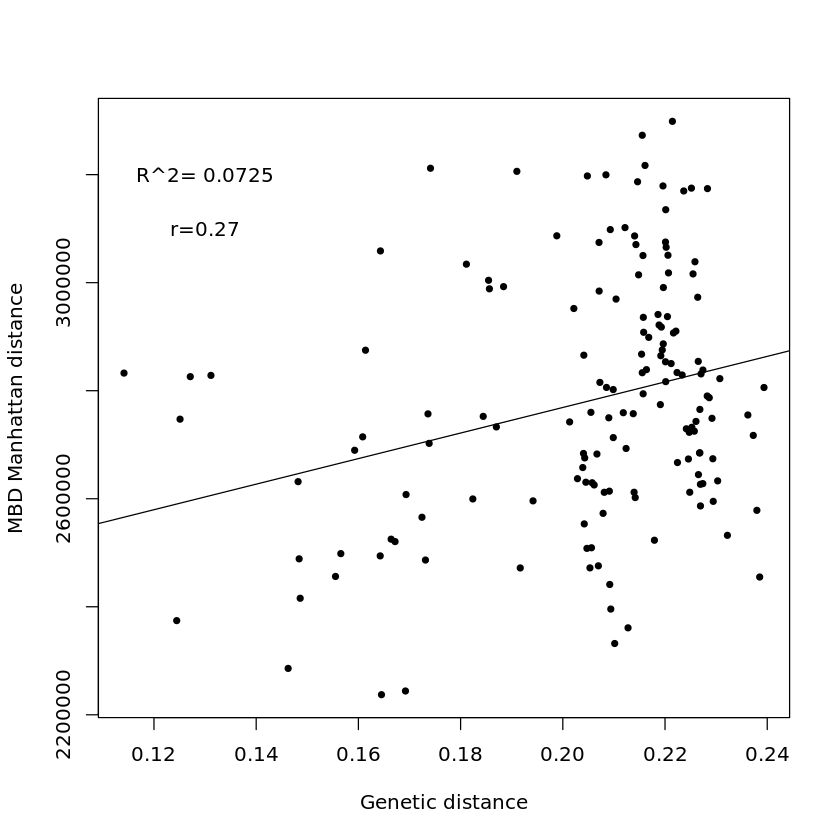

In [14]:
#library(MASS)
#dens <- kde2d(Dgeo,DgenN, n=300)
#myPal <- colorRampPalette(c("white","blue","gold", "orange", "red"))
plot(Dgen, Dep5, pch=20,cex=1,xlab = "Genetic distance", ylab = "MBD Manhattan distance")
summary(lm(Dep5~Dgen),)
R2 = round(summary(lm(Dep5~Dgen))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(Dep5~Dgen))
text(0.13,3200000,label=paste("R^2=",R2))
text(0.13,3100000,label="r=0.27")

### For DMLs

In [15]:
#read in epigenetic Manhattan distance, 10 coverage, DML 
ep10 <-read.csv("../analyses/methylation-filtered/dist.manhat.DMLs.csv",header = T)
ep10 <- ep10[,c("SampNum.row","SampNum.col","dist.manh")]
ep10 <- as.matrix(list2dist(ep10))
mbdorder = c("hc1_2","hc1_4","hc2_15","hc2_17","hc3_1","hc3_5","hc3_7","hc3_10","hc3_11",
        "ss2_9","ss2_14","ss2_18","ss3_3","ss3_14","ss3_15","ss3_16","ss3_20","ss5_18")
ep10 <- ep10[mbdorder, mbdorder]
ep10
Dep10 <- as.dist(ep10)

,hc1_2,hc1_4,hc2_15,hc2_17,hc3_1,hc3_5,hc3_7,hc3_10,hc3_11,ss2_9,ss2_14,ss2_18,ss3_3,ss3_14,ss3_15,ss3_16,ss3_20,ss5_18
hc1_2,0.00,122854.8,117833.69,121924.6,122048.45,88251.19,122113.69,102701.5,117925.2,179529.92,180204.79,168741.42,180553.19,177851.85,158737.9,179176.20,151791.6,173015.35
hc1_4,122854.80,0.0,109179.36,101955.7,112350.01,121048.80,102968.43,121351.0,118987.8,187958.77,190402.67,179482.58,189540.66,186142.74,168699.4,187705.68,162244.6,181837.12
hc2_15,117833.69,109179.4,0.00,101404.9,109983.52,123337.37,95894.53,116572.8,114520.9,190230.48,190926.63,178951.49,190496.05,188937.39,168712.1,189067.06,163370.8,183103.29
hc2_17,121924.58,101955.7,101404.90,0.0,116803.75,120192.08,104194.92,119223.2,120836.2,187025.52,189470.60,182139.42,189094.54,186588.74,166280.4,186926.44,161377.4,182154.17
hc3_1,122048.45,112350.0,109983.52,116803.8,0.00,124639.71,84634.75,127938.6,117236.5,190032.93,190165.48,181890.70,193403.62,189630.02,170386.8,192128.15,164928.4,185042.82
hc3_5,88251.19,121048.8,123337.37,120192.1,124639.71,0.00,124873.66,107091.3,119500.3,177061.13,176343.02,167518.30,178051.37,174936.90,157002.4,175158.45,152948.9,169232.11
hc3_7,122113.69,102968.4,95894.53,104194.9,84634.75,124873.66,0.00,122879.0,118978.7,196726.19,197363.50,186164.84,199380.37,198074.72,174234.3,198070.18,171071.9,191199.20
hc3_10,102701.55,121351.0,116572.80,119223.2,127938.59,107091.25,122879.03,0.0,119768.1,178788.12,180215.96,171130.51,181920.21,177760.85,160786.0,178066.79,155844.3,175961.75
hc3_11,117925.23,118987.8,114520.90,120836.2,117236.50,119500.33,118978.71,119768.1,0.0,174002.37,176288.17,166228.89,176696.28,173248.65,154512.7,173175.17,151397.1,167264.17
ss2_9,179529.92,187958.8,190230.48,187025.5,190032.93,177061.13,196726.19,178788.1,174002.4,0.00,94644.82,101674.37,92191.75,96374.49,113633.2,94374.59,118461.7,101448.22


In [16]:
distObj <- list(Dep10,Dgen)
save(distObj,file="../analyses/2bRAD/MethGen/dist_DML5x_snp.Robj")

In [17]:
cor.test( ~ Dep10 + Dgen,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ Dep10 + Dgen, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  Dep10 and Dgen
t = 13.286, df = 151, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6513392 0.7996648
sample estimates:
      cor 
0.7341414 



	Spearman's rank correlation rho

data:  Dep10 and Dgen
S = 177642, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7023944 



Call:
lm(formula = Dep10 ~ Dgen)

Residuals:
   Min     1Q Median     3Q    Max 
-46810 -19691   3017  20734  47898 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -65864      16040  -4.106 6.57e-05 ***
Dgen         1030929      77594  13.286  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25020 on 151 degrees of freedom
Multiple R-squared:  0.539,	Adjusted R-squared:  0.5359 
F-statistic: 176.5 on 1 and 151 DF,  p-value: < 2.2e-16


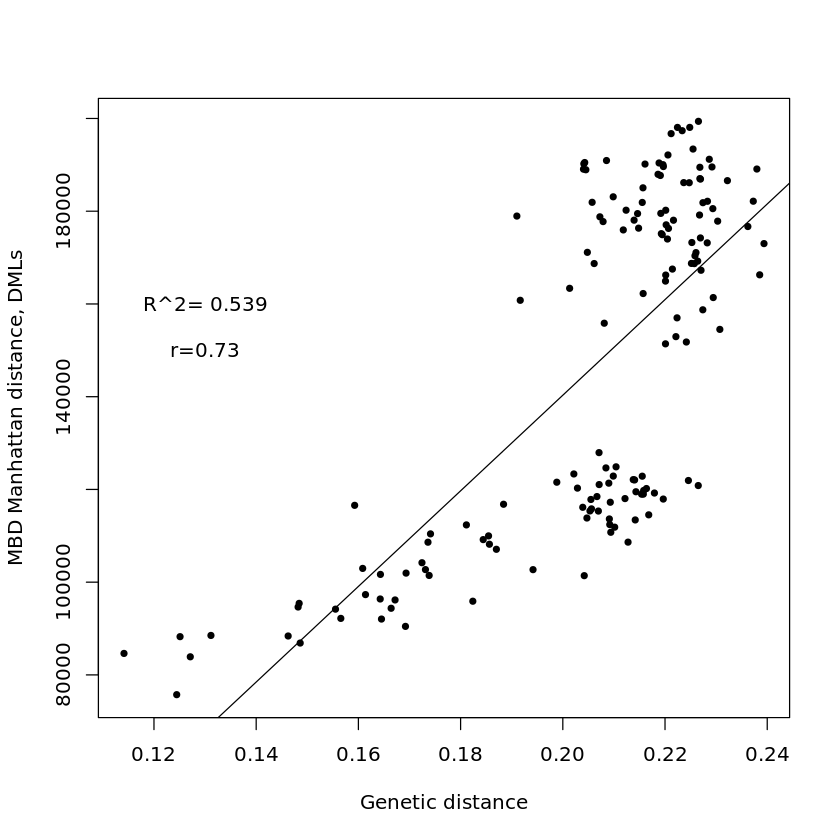

In [19]:
plot(Dgen, Dep10, pch=20,cex=1,xlab = "Genetic distance", ylab = "MBD Manhattan distance, DMLs")
summary(lm(Dep10~Dgen),)
R2 = round(summary(lm(Dep10~Dgen))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(Dep10~Dgen))
text(0.13,160000,label=paste("R^2=",R2))
text(0.13,150000,label="r=0.73")

## Non CpG-SNPs (not done)

In [28]:

js("pwd")

/gpfs01/home/kes0132/CommonG_cp2/2019_Mapping/paper-oly-mbdbs-gen/code


In [9]:
js("head ../analyses/methylation-filtered/dist.manhat.csv")

"SeqNum.row","SeqNum.col","dist.manh","SampNum.row","SampNum.col"
1,1,0,"hc1_2","hc1_2"
1,15,273985.441785306,"ss3_15","hc1_2"
1,3,290189.490642819,"hc2_15","hc1_2"
1,17,285476.927245925,"ss3_20","hc1_2"
1,4,281520.711361473,"hc2_17","hc1_2"
1,2,298303.029739484,"hc1_4","hc1_2"
1,7,298537.38668563,"hc3_7","hc1_2"
1,16,284208.486947856,"ss3_16","hc1_2"
1,14,281305.331808996,"ss3_14","hc1_2"


In [10]:
#read in epigenetic Manhattan distance, 10 coverage 
library(spaa)
ep10 <-read.csv("../analyses/methylation-filtered/dist.manhat.csv",header = T)
ep10 <- ep10[,c("SampNum.row","SampNum.col","dist.manh")]
ep10 <- as.matrix(list2dist(ep10))
mbdorder = c("hc1_2","hc1_4","hc2_15","hc2_17","hc3_1","hc3_5","hc3_7","hc3_10","hc3_11",
        "ss2_9","ss2_14","ss2_18","ss3_3","ss3_14","ss3_15","ss3_16","ss3_20","ss5_18")
ep10 <- ep10[mbdorder, mbdorder]
ep10
Dep10 <- as.dist(ep10)

,hc1_2,hc1_4,hc2_15,hc2_17,hc3_1,hc3_5,hc3_7,hc3_10,hc3_11,ss2_9,ss2_14,ss2_18,ss3_3,ss3_14,ss3_15,ss3_16,ss3_20,ss5_18
hc1_2,0.0,298303.0,290189.5,281520.7,323694.5,288274.1,298537.4,276634.8,311367.0,297793.0,280529.9,334528.1,284554.6,281305.3,273985.4,284208.5,285476.9,297048.1
hc1_4,298303.0,0.0,288401.4,272689.0,314054.6,308425.8,290930.3,292157.4,313295.9,306377.3,291403.7,334752.1,291934.5,287946.6,285750.2,292011.5,290794.1,299482.5
hc2_15,290189.5,288401.4,0.0,267996.3,312934.8,306314.1,276217.9,283512.3,309629.3,296792.4,273417.4,339043.0,280972.0,277302.7,270960.4,281246.4,283754.6,297864.8
hc2_17,281520.7,272689.0,267996.3,0.0,314787.3,299622.6,275369.7,267637.3,306306.9,287060.1,263776.1,339119.1,274036.3,268751.4,256317.1,272144.4,273361.0,290238.7
hc3_1,323694.5,314054.6,312934.8,314787.3,0.0,334641.8,299112.8,325937.0,324463.8,321179.5,320997.4,335280.4,315988.8,313767.2,321554.2,317127.8,317475.6,315139.7
hc3_5,288274.1,308425.8,306314.1,299622.6,334641.8,0.0,315610.7,288781.8,325942.9,316722.4,306762.5,346143.9,305665.1,303050.4,296746.5,308046.6,304834.4,313945.2
hc3_7,298537.4,290930.3,276217.9,275369.7,299112.8,315610.7,0.0,292111.6,315363.0,297745.1,282259.6,341069.9,284236.7,279628.7,277165.4,285466.0,287941.8,299663.9
hc3_10,276634.8,292157.4,283512.3,267637.3,325937.0,288781.8,292111.6,0.0,317230.3,297372.5,267563.6,345360.9,279921.4,274370.7,257816.0,277769.7,274299.4,294286.7
hc3_11,311367.0,313295.9,309629.3,306306.9,324463.8,325942.9,315363.0,317230.3,0.0,306749.7,303226.0,330648.3,295962.1,294657.6,302097.9,297720.5,300676.0,304098.3
ss2_9,297793.0,306377.3,296792.4,287060.1,321179.5,316722.4,297745.1,297372.5,306749.7,0.0,253556.8,313685.4,255231.0,253726.0,268911.5,256477.3,273957.8,278320.1


In [19]:
Dep10

           hc1_2     hc1_4    hc2_15    hc2_17     hc3_1     hc3_5     hc3_7
hc1_4  10545.532                                                            
hc2_15 10351.204  9064.440                                                  
hc2_17  9385.573  7984.184  8032.958                                        
hc3_1  10610.214  8727.395  9008.169  9827.633                              
hc3_5   6363.300  8905.577  9760.334  8017.600  8808.350                    
hc3_7  10611.443  8699.207  7750.867  8785.571  6567.108  9189.478          
hc3_10  8551.481 10736.499 10319.292  9408.603 10436.642  7834.229 10443.443
hc3_11  9068.337 10026.701 11194.320 10454.902 10554.475  9119.644 10804.160
ss2_9  14788.300 17346.810 16995.519 16400.962 16222.809 15202.564 17348.604
ss2_14 14887.002 16626.609 16120.010 16108.636 16014.164 15975.183 16705.442
ss2_18 13635.256 15169.867 15450.882 15381.091 13934.951 13292.572 14868.123
ss3_3  14606.952 16480.535 16418.206 15743.180 15248.147 15959.683 16044.562

In [11]:
# read in genetic distances
gen <- read.table(paste0(POP,"_mbd.dist"), row.names = 1, header=T)
gen
Dgen <- as.dist(gen)

,hc1_2,hc1_4,hc2_15,hc2_17,hc3_1,hc3_5,hc3_7,hc3_10,hc3_11,ss2_9,ss2_14,ss2_18,ss3_3,ss3_14,ss3_15,ss3_16,ss3_20,ss5_18
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hc1_2,0.0000000,0.2155436,0.2054988,0.2245761,0.2140475,0.1251035,0.2137833,0.1941731,0.2196581,0.2191748,0.2201363,0.2251679,0.2293540,0.2303018,0.2273960,0.2267536,0.2241723,0.2393679
hc1_4,0.2155436,0.0000000,0.1844240,0.1693271,0.1811331,0.2071129,0.1608409,0.2090009,0.2157563,0.2186305,0.2188330,0.2146309,0.2291905,0.2247412,0.2257357,0.2190871,0.2157204,0.2274161
hc2_15,0.2054988,0.1844240,0.0000000,0.2041950,0.1854690,0.2021604,0.1823913,0.1592689,0.2168135,0.2041132,0.2085476,0.1910094,0.2042863,0.2045106,0.2061360,0.2040459,0.2013346,0.2098602
hc2_17,0.2245761,0.1693271,0.2041950,0.0000000,0.1884048,0.2163634,0.1724402,0.2179260,0.2265039,0.2268210,0.2268209,0.2283067,0.2379735,0.2322090,0.2385235,0.2269364,0.2294361,0.2372695
hc3_1,0.2140475,0.1811331,0.1854690,0.1884048,0.0000000,0.2084380,0.1141350,0.2070880,0.2092909,0.2195993,0.2160866,0.2155464,0.2254828,0.2196778,0.2258590,0.2205749,0.2200920,0.2156870
hc3_5,0.1251035,0.2071129,0.2021604,0.2163634,0.2084380,0.0000000,0.2104185,0.1869989,0.2143060,0.2202222,0.2148287,0.2214425,0.2216537,0.2194587,0.2223524,0.2192765,0.2221298,0.2263948
hc3_7,0.2137833,0.1608409,0.1823913,0.1724402,0.1141350,0.2104185,0.0000000,0.2098760,0.2154145,0.2211945,0.2233552,0.2236631,0.2265407,0.2248371,0.2269251,0.2224353,0.2260581,0.2286600
hc3_10,0.1941731,0.2090009,0.1592689,0.2179260,0.2070880,0.1869989,0.2098760,0.0000000,0.2158190,0.2072541,0.2123815,0.2048036,0.2057382,0.2078799,0.1916720,0.2139469,0.2081097,0.2118349
hc3_11,0.2196581,0.2157563,0.2168135,0.2265039,0.2092909,0.2143060,0.2154145,0.2158190,0.0000000,0.2204729,0.2206785,0.2201360,0.2362094,0.2252514,0.2307265,0.2282604,0.2200907,0.2270442


In [18]:
distObj <- list(Dep10,Dgen)
names(distObj) <- c("Dep10","Dgen")
save(distObj,file="../analyses/2bRAD/MethGen/dist_allmeth_snp.Robj")


Call:
lm(formula = Dep10 ~ Dgen)

Residuals:
   Min     1Q Median     3Q    Max 
-53094 -17259   -937  18870  54443 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   229505      15591  14.720  < 2e-16 ***
Dgen          299862      75420   3.976 0.000108 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24320 on 151 degrees of freedom
Multiple R-squared:  0.09477,	Adjusted R-squared:  0.08877 
F-statistic: 15.81 on 1 and 151 DF,  p-value: 0.0001084


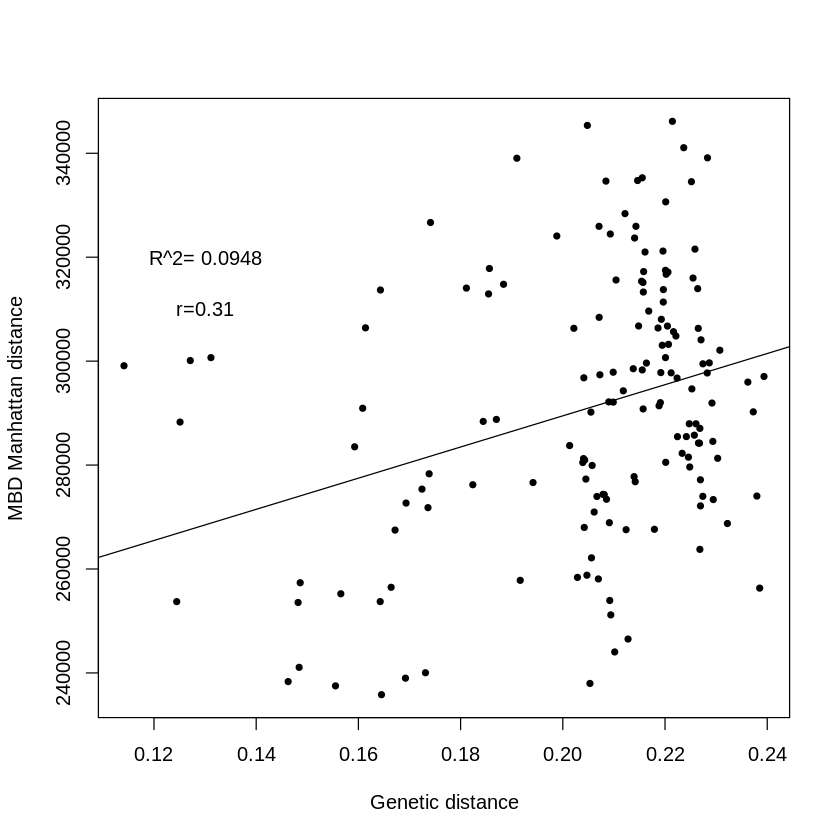

In [6]:
#library(MASS)
#dens <- kde2d(Dgeo,DgenN, n=300)
#myPal <- colorRampPalette(c("white","blue","gold", "orange", "red"))
plot(Dgen, Dep10, pch=20,cex=1,xlab = "Genetic distance", ylab = "MBD Manhattan distance")
summary(lm(Dep10~Dgen),)
R2 = round(summary(lm(Dep10~Dgen))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(Dep10~Dgen))
text(0.13,320000,label=paste("R^2=",R2))
text(0.13,310000,label="r=0.31")

In [13]:
cor.test( ~ Dep10 + Dgen,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ Dep10 + Dgen, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  Dep10 and Dgen
t = 3.9759, df = 151, p-value = 0.0001084
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1568240 0.4447926
sample estimates:
      cor 
0.3078416 



	Spearman's rank correlation rho

data:  Dep10 and Dgen
S = 444614, p-value = 0.001505
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2551332 


### For DMLs

In [14]:
#read in epigenetic Manhattan distance, 5 coverage, DML 
ep10 <-read.csv("../analyses/methylation-filtered/dist.manhat.DMLs.csv",header = T)
ep10 <- ep10[,c("SampNum.row","SampNum.col","dist.manh")]
ep10 <- as.matrix(list2dist(ep10))
mbdorder = c("hc1_2","hc1_4","hc2_15","hc2_17","hc3_1","hc3_5","hc3_7","hc3_10","hc3_11",
        "ss2_9","ss2_14","ss2_18","ss3_3","ss3_14","ss3_15","ss3_16","ss3_20","ss5_18")
ep10 <- ep10[mbdorder, mbdorder]
ep10
Dep10 <- as.dist(ep10)

,hc1_2,hc1_4,hc2_15,hc2_17,hc3_1,hc3_5,hc3_7,hc3_10,hc3_11,ss2_9,ss2_14,ss2_18,ss3_3,ss3_14,ss3_15,ss3_16,ss3_20,ss5_18
hc1_2,0.000,10545.532,10351.204,9385.573,10610.214,6363.300,10611.443,8551.481,9068.337,14788.300,14887.002,13635.256,14606.952,14484.494,11693.997,14072.044,11702.18,13190.286
hc1_4,10545.532,0.000,9064.440,7984.184,8727.395,8905.577,8699.207,10736.499,10026.701,17346.810,16626.609,15169.867,16480.535,16347.990,14253.680,15345.568,13291.64,15195.551
hc2_15,10351.204,9064.440,0.000,8032.958,9008.169,9760.334,7750.867,10319.292,11194.320,16995.519,16120.010,15450.882,16418.206,16417.512,13740.327,15822.143,13357.00,15649.929
hc2_17,9385.573,7984.184,8032.958,0.000,9827.633,8017.600,8785.571,9408.603,10454.902,16400.962,16108.636,15381.091,15743.180,15586.173,13138.397,14668.390,12158.79,14422.239
hc3_1,10610.214,8727.395,9008.169,9827.633,0.000,8808.350,6567.108,10436.642,10554.475,16222.809,16014.164,13934.951,15248.147,14915.306,12793.947,14521.674,12503.21,13721.460
hc3_5,6363.300,8905.577,9760.334,8017.600,8808.350,0.000,9189.478,7834.229,9119.644,15202.564,15975.183,13292.572,15959.683,15121.119,11756.756,15334.174,12440.56,14534.806
hc3_7,10611.443,8699.207,7750.867,8785.571,6567.108,9189.478,0.000,10443.443,10804.160,17348.604,16705.442,14868.123,16044.562,16375.903,13350.965,16117.654,13837.97,15293.315
hc3_10,8551.481,10736.499,10319.292,9408.603,10436.642,7834.229,10443.443,0.000,10148.679,15486.501,14988.730,13497.210,15209.257,14489.565,12354.985,14441.498,11705.99,14281.504
hc3_11,9068.337,10026.701,11194.320,10454.902,10554.475,9119.644,10804.160,10148.679,0.000,15102.614,14709.279,13012.517,14188.195,14113.226,11779.373,13574.423,12187.15,13623.710
ss2_9,14788.300,17346.810,16995.519,16400.962,16222.809,15202.564,17348.604,15486.501,15102.614,0.000,9317.558,8747.628,8413.878,9119.600,10149.293,8682.160,11387.52,8899.327


In [15]:
distObj <- list(Dep10,Dgen)
save(distObj,file="../analyses/2bRAD/MethGen/dist_DML_snp.Robj")


Call:
lm(formula = Dep10 ~ Dgen)

Residuals:
   Min     1Q Median     3Q    Max 
 -5032  -1730    -81   1508   4874 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -3343       1374  -2.433   0.0161 *  
Dgen           75762       6646  11.400   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2143 on 151 degrees of freedom
Multiple R-squared:  0.4625,	Adjusted R-squared:  0.459 
F-statistic:   130 on 1 and 151 DF,  p-value: < 2.2e-16


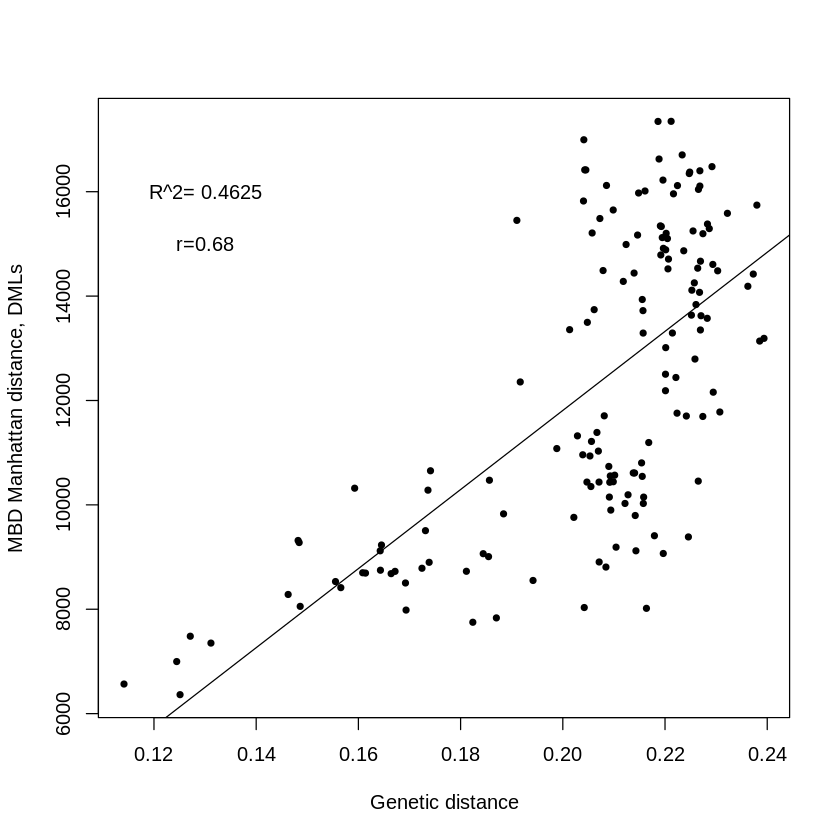

In [9]:
#library(MASS)
#dens <- kde2d(Dgeo,DgenN, n=300)
#myPal <- colorRampPalette(c("white","blue","gold", "orange", "red"))
plot(Dgen, Dep10, pch=20,cex=1,xlab = "Genetic distance", ylab = "MBD Manhattan distance, DMLs")
summary(lm(Dep10~Dgen),)
R2 = round(summary(lm(Dep10~Dgen))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(Dep10~Dgen))
text(0.13,16000,label=paste("R^2=",R2))
text(0.13,15000,label="r=0.68")

In [11]:
cor.test( ~ Dep10 + Dgen,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ Dep10 + Dgen, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  Dep10 and Dgen
t = 11.529, df = 151, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5895371 0.7603386
sample estimates:
      cor 
0.6842097 



	Spearman's rank correlation rho

data:  Dep10 and Dgen
S = 209532, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6489687 


# Correlate Pst and Fst  
maybe redo gene oveerlap if interestied  
## For 10kb bins

In [24]:
%%bash
# use previously created genome fai file as the bedfile input
awk 'FS=OFS="\t"{print $1, 0, $2}' ../../Olurida_v081.fa.fai \
| bedtools makewindows -b - -w 10000 > ../genome-features/Olurida_v081_10kbIntervals.bed

In [20]:
js("head ../analyses/2bRAD/Inputs/Olurida_v081_10kbIntervals.bed")

Contig0	0	10000
Contig0	10000	20000
Contig0	20000	30000
Contig0	30000	40000
Contig0	40000	50000
Contig0	50000	60000
Contig0	60000	70000
Contig0	70000	80000
Contig0	80000	90000
Contig0	90000	100000


In [21]:
# reading regions
regions=read.table("../genome-features/Olurida_v081_10kbIntervals.bed")
names(regions)=c("contig","start","end")

In [22]:
# read in fst data
fst01=read.table("../analyses/2bRAD/HCSS_sfsm70_fst2pop.fst")
names(fst01)=c("contig","pos","a","b")

fst01$contig=as.character(fst01$contig)

In [23]:
# removing zero-only (invariant) bases
fst01[,3:4]=round(fst01[,3:4],3)
ch01=apply(fst01[,3:4],1,sum)
chh=(ch01>0)
table(chh)

fst01=fst01[chh,]
head(fst01)

chh
 FALSE   TRUE 
363405   5882 

,contig,pos,a,b
,<chr>,<int>,<dbl>,<dbl>
64,Contig0,74432,0.000,0.009
82,Contig0,109103,0.034,0.457
98,Contig0,109119,0.003,0.052
102,Contig0,109123,0.002,0.067
114,Contig1,40362,0.000,0.009
169,Contig1,42880,0.003,0.078


In [24]:
# computing weighted Fst per region
i=1;gfst01=c();ns01=0;snp=c();a=c();b=c()
pb=txtProgressBar(0,nrow(regions))
for (i in 1:nrow(regions)) {
	setTxtProgressBar(pb,i)
	sub=subset(fst01,contig==regions$contig[i] & pos>=regions$start[i] & pos<=regions$end[i])
	if (is.null(sub[1,1]) | sum(sub$b)==0) { 
		gfst01=append(gfst01,NA)
	} else {
		gfst01=append(gfst01,sum(sub$a)/sum(sub$b))
		ns01=ns01+nrow(sub)
        snp=append(snp,paste(sub$contig,sub$pos,sep="_"))
        a=append(a,sub$a)
        b=append(b,sub$b)
	}
}

In [27]:
geneSites <- cbind(as.data.frame(snp,stringsAsFactors = F),a,b,stringsAsFactors = F)
geneSites <- distinct(geneSites)
dim(geneSites)

[1] 5882    3

In [28]:
head(geneSites)

,snp,a,b
,<chr>,<dbl>,<dbl>
1,Contig0_74432,0.000,0.009
2,Contig0_109103,0.034,0.457
3,Contig0_109119,0.003,0.052
4,Contig0_109123,0.002,0.067
5,Contig1_40362,0.000,0.009
6,Contig1_42880,0.003,0.078


In [29]:
#weighted Fst for SNPs in 10kb regions
sum(geneSites$a)/sum(geneSites$b)

[1] 0.09706945

In [30]:
#unweighted Fst for SNPs in 10kb regions
rat <- geneSites$a/geneSites$b
mean(rat,na.rm=T)

[1] 0.05959145

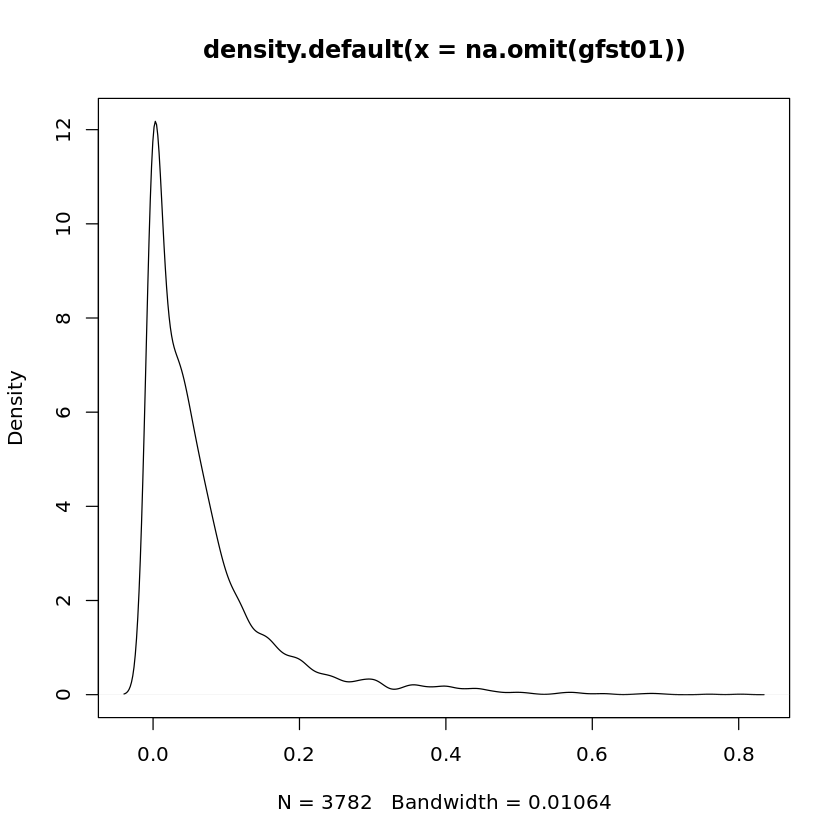

In [31]:
# density plots of per-region Fst
plot(density(na.omit(gfst01)))

In [32]:
#adding results to regions table, saving
regions$fst01=gfst01
regionsNA <- regions[!is.na(regions$fst01),]
head(regionsNA)
#save bed file of intervals only with fst data
write.csv(regionsNA,file="../analyses/2bRAD/MethGen/HCSS_sfsm70_Per10kbFst.csv",quote=F,row.names=F)

,contig,start,end,fst01
,<chr>,<int>,<int>,<dbl>
8,Contig0,70000,80000,0.00000000
11,Contig0,100000,110000,0.06770833
17,Contig1,40000,50000,0.03448276
23,Contig2,10000,20000,0.02127660
35,Contig2,130000,139250,0.00000000
37,Contig3,10000,20000,0.25287356


In [33]:
mean(regionsNA$fst01)

[1] 0.06641184

In [34]:
nrow(regionsNA)

[1] 3782

In [35]:
filtbed <- regionsNA[,c("contig","start","end")]
write.table(filtbed, "../analyses/2bRAD/MethGen/HCSS_sfsm70_Per10kb.bed",quote=F,row.names=F,col.names = F)

#### Compare with overlappin Pst bins

In [36]:
regionsNA <- read.csv("../analyses/2bRAD/MethGen/HCSS_sfsm70_Per10kbFst.csv")
id <- paste(regionsNA$contig,regionsNA$start,regionsNA$end, sep = "_")
regionsNA <- cbind(id,regionsNA)
head(regionsNA)

,id,contig,start,end,fst01
,<chr>,<chr>,<int>,<int>,<dbl>
1,Contig0_70000_80000,Contig0,70000,80000,0.00000000
2,Contig0_100000_110000,Contig0,100000,110000,0.06770833
3,Contig1_40000_50000,Contig1,40000,50000,0.03448276
4,Contig2_10000_20000,Contig2,10000,20000,0.02127660
5,Contig2_130000_139250,Contig2,130000,139250,0.00000000
6,Contig3_10000_20000,Contig3,10000,20000,0.25287356


In [37]:
# read in Pst data
pst10kb <- read.csv("../analyses/methylation-filtered/Pst_bins_10kb.tab", sep="\t",header=T,stringsAsFactors = F)
colnames(pst10kb) <- c("id","contig","start","end","pst","pst.lowCI","pst.highCI")
head(pst10kb)
nrow(pst10kb)

,id,contig,start,end,pst,pst.lowCI,pst.highCI
,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Contig0_70000_80000,Contig0,70000,80000,0.03413975,0.0004093522,0.7746472
2,Contig100484_10000_13621,Contig100484,10000,13621,0.04039275,0.0010121740,0.7577370
3,Contig10074_0_6621,Contig10074,0,6621,0.36138305,0.0022606581,0.8092501
4,Contig100771_0_1852,Contig100771,0,1852,0.01811047,0.0008525946,0.7631854
5,Contig102229_0_10000,Contig102229,0,10000,0.05933308,0.0006847296,0.7844142
6,Contig10259_0_9151,Contig10259,0,9151,0.22438574,0.0018436786,0.7552582


[1] 827

#### 827 overlapping bins

In [38]:
both = merge(pst10kb,regionsNA, by ="id")
#both <- both[,c("id","pst","fst01")]
head(both)

,id,contig.x,start.x,end.x,pst,pst.lowCI,pst.highCI,contig.y,start.y,end.y,fst01
,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<dbl>
1,Contig0_70000_80000,Contig0,70000,80000,0.03413975,0.0004093522,0.7746472,Contig0,70000,80000,0.00000000
2,Contig100484_10000_13621,Contig100484,10000,13621,0.04039275,0.0010121740,0.7577370,Contig100484,10000,13621,0.05769231
3,Contig10074_0_6621,Contig10074,0,6621,0.36138305,0.0022606581,0.8092501,Contig10074,0,6621,0.19201995
4,Contig100771_0_1852,Contig100771,0,1852,0.01811047,0.0008525946,0.7631854,Contig100771,0,1852,0.14919355
5,Contig102229_0_10000,Contig102229,0,10000,0.05933308,0.0006847296,0.7844142,Contig102229,0,10000,0.00000000
6,Contig10259_0_9151,Contig10259,0,9151,0.22438574,0.0018436786,0.7552582,Contig10259,0,9151,0.10266940


In [39]:
mean(both$fst01)
mean(both$pst)

[1] 0.06547806

[1] 0.3030801

In [40]:
cor.test( ~ both$pst + both$fst01,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ both$pst + both$fst01, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  both$pst and both$fst01
t = -0.15004, df = 825, p-value = 0.8808
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.07337011  0.06297153
sample estimates:
         cor 
-0.005223564 


Warning message in cor.test.default(x = c(0.0341397522278473, 0.0403927503300008, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  both$pst and both$fst01
S = 94490042, p-value = 0.9461
alternative hypothesis: true rho is not equal to 0
sample estimates:
         rho 
-0.002354627 



Call:
lm(formula = both$pst ~ both$fst01)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30386 -0.23723 -0.05892  0.19445  0.70007 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.30403    0.01091   27.87   <2e-16 ***
both$fst01  -0.01444    0.09622   -0.15    0.881    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2561 on 825 degrees of freedom
Multiple R-squared:  2.729e-05,	Adjusted R-squared:  -0.001185 
F-statistic: 0.02251 on 1 and 825 DF,  p-value: 0.8808


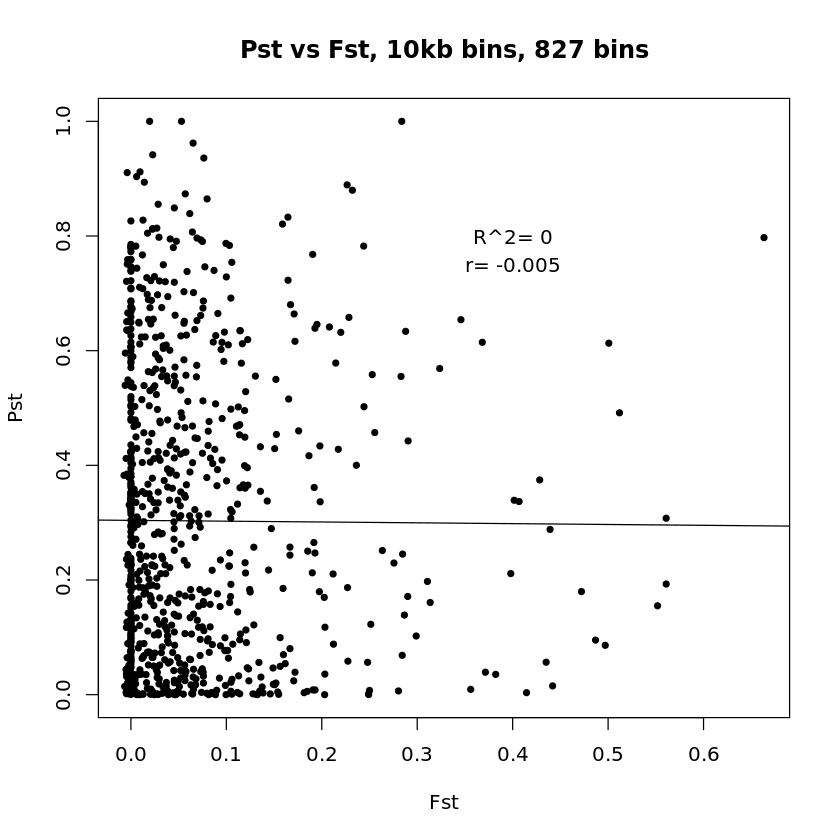

In [41]:
plot(both$fst01, both$pst, pch=20,cex=1,xlab = "Fst", ylab = "Pst")
title("Pst vs Fst, 10kb bins, 827 bins")
summary(lm(both$pst~both$fst01),)
R2 = round(summary(lm(both$pst~both$fst01))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(both$pst~both$fst01))
text(0.4,0.8,label=paste("R^2=",R2))
text(0.4,0.75,label="r= -0.005")

# Correlating PC scores for genetic and epigenetic data

### All methylation data (5x)

In [42]:
# Read in PC scores from epigenetics
ep <- read.table("../analyses/methylation-filtered/PC-scores-filtered-methylation.tab",
                 header=T, sep="\t",row.names = "sample")

Add sample names to PC score matrix

In [43]:
key = read.csv("../data/sample-key.csv",colClasses = c("character","character"))

In [46]:
samples = rownames(ep)
mapdf <- data.frame(old=key$MBD.FILENAME,new=key$SAMPLE)
rownames(ep) <- mapdf$new[match(samples,mapdf$old)]

In [47]:
ep

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hc1_2,-41.855179,48.129186,-89.423468,20.22070,-29.7202460,158.846259,63.693423,95.04688,-240.359208,-1.583968,-51.04567,-39.903419,22.8062963,19.642542,-5.516195,-6.89146481,-4.1565798,-8.954237e-13
hc1_4,-3.141767,68.092352,33.976913,181.69572,71.4365693,-237.591754,-13.896974,70.05871,-89.446720,-25.612906,-47.69838,-7.094666,-51.7706657,-22.686702,-9.008882,-0.86495842,2.5512477,-1.078092e-12
hc2_15,-38.552940,64.282695,55.518975,117.51097,22.9760019,116.363538,-47.778507,-188.55458,33.498908,-176.912782,-63.28670,-25.898024,-47.3524892,-7.459777,-5.933131,-0.81121599,-5.6725954,-6.715565e-13
hc2_17,-82.093747,44.408345,27.834560,70.94997,50.9966792,-10.599225,3.198294,8.42252,46.912464,-14.378083,70.47019,16.195739,252.9834935,85.447893,57.180445,-4.80047455,-2.9124148,-4.472849e-13
hc3_1,224.746062,240.034234,133.312802,-170.12095,27.4689155,-2.215026,16.470975,44.05080,6.833667,-41.934739,-8.28425,4.153790,10.6881919,-8.717818,1.262954,3.09348631,-0.1519688,-7.986172e-13
hc3_5,-31.510415,124.975628,-317.775086,-90.90335,9.5736442,-71.192278,-70.182743,-80.20398,37.175811,20.276913,-17.84866,-13.758503,3.0338443,-11.204631,4.449811,2.95571290,-0.7183613,-2.464503e-13
hc3_7,2.266559,88.206573,80.134766,76.71013,24.0733767,58.501761,-54.978134,-103.41131,-20.776915,246.470031,86.25975,-12.393247,-58.4778249,18.914360,-9.712800,-6.72069143,-1.3720118,-7.084814e-14
hc3_10,-107.031724,36.136923,-44.786067,10.04223,53.0399616,50.226984,77.862837,104.50437,69.139601,-62.148411,151.70808,138.668209,-133.1581378,38.464803,30.817861,5.40631998,-7.5503503,-5.897121e-13
hc3_11,90.595770,8.032785,-17.444734,79.06294,-312.3872200,-43.718287,90.965691,-25.50297,37.011081,-6.446748,39.40510,17.974319,9.6832275,-8.125046,-6.630260,0.80489946,-0.5893811,-8.516853e-14


In [48]:
#covmat is different order than adegent pca
gen <- read.table("../analyses/2bRAD/MethGen/MBD_pca_covMat.tsv")
mbdorder = c("hc1_2","hc1_4","hc2_15","hc2_17","hc3_1","hc3_10","hc3_11","hc3_5","hc3_7",
        "ss2_14","ss2_18","ss2_9","ss3_14","ss3_15","ss3_16","ss3_20","ss3_3","ss5_18")
rownames(gen) <- mbdorder
gen
#make sure ep and gen in same order
ep <- ep[mbdorder,]
pop = as.factor(c(rep("Hood Canal",9),rep("South Sound",9)))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,Pop
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
hc1_2,-0.169157009,0.32979333,-0.0925416296,0.50520867,-0.294133348,0.26493543,-0.06140564,-0.006872229,0.04954539,-0.03079583,0.16689447,-0.019328195,-0.35883554,0.29791521,-0.122308974,-0.111055481,-0.375556625,0.144280831,HC
hc1_4,-0.271757005,-0.34897316,-0.2228580558,0.07179135,0.140243789,0.05948359,0.23457074,-0.431635637,0.58806689,-0.31398495,-0.05176609,0.072893855,-0.08775922,-0.04412887,0.022912601,-0.146603418,0.022401047,-0.020879124,HC
hc2_15,-0.071626776,-0.08966038,-0.0397213904,-0.09019719,0.008315516,-0.08914973,-0.13072719,-0.577920092,-0.10440079,0.71562241,-0.01947412,0.022977518,-0.18519793,0.22058976,0.071916895,-0.041643594,0.064886645,0.004739740,HC
hc2_17,-0.298667880,-0.46065814,0.1709509477,0.50626010,0.477551173,-0.14189869,-0.12229645,0.248062189,-0.22116443,0.09107086,0.10440924,-0.118132992,-0.02734497,0.03632917,0.021668054,-0.059933906,-0.003101467,0.013541656,HC
hc3_1,-0.256597468,-0.26360918,-0.1601116901,-0.25708967,-0.429531489,-0.01684808,-0.01589535,0.228308475,-0.20952811,-0.03248925,0.06665936,-0.095151431,-0.09836574,0.02562810,0.010099832,-0.650256453,0.209656174,-0.009993740,HC
hc3_10,-0.065071796,0.29433533,-0.1021351748,0.05611128,0.049239062,-0.72913326,0.52168553,-0.007792869,-0.08157511,-0.05036670,0.21913731,0.012004485,-0.11929153,0.11770265,0.002913704,-0.032029642,0.047016400,-0.024292181,HC
hc3_11,-0.125488142,0.01373902,0.8988541987,-0.11639476,-0.143160319,-0.01167964,0.05355827,-0.120221710,0.11441735,-0.16274347,0.03271447,-0.005991747,-0.19713438,0.15824428,0.058861658,-0.028844206,0.117987901,-0.042665776,HC
hc3_5,-0.143120769,0.25833924,-0.0773359071,0.39861545,-0.166206946,0.13312088,-0.01994485,0.001502115,0.08777540,0.06530467,-0.01659665,-0.105096992,0.07948560,-0.09322778,0.197338624,0.138111410,0.761771924,-0.159821780,HC
hc3_7,-0.318831783,-0.31672402,-0.1685526135,-0.20871865,-0.302968493,-0.06214955,-0.05833547,0.105436774,-0.07224308,-0.10760250,0.15323289,-0.041115290,-0.18920247,0.18938030,-0.009664227,0.707551090,0.006904790,-0.038549729,HC


In [49]:
pop

[1] Hood Canal  Hood Canal  Hood Canal  Hood Canal  Hood Canal  Hood Canal 
 [7] Hood Canal  Hood Canal  Hood Canal  South Sound South Sound South Sound
[13] South Sound South Sound South Sound South Sound South Sound South Sound
Levels: Hood Canal South Sound

In [50]:
cor.test( ~ ep$PC2 + gen$PC1,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ ep$PC2 + gen$PC1, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  ep$PC2 and gen$PC1
t = -6.0608, df = 16, p-value = 1.652e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9365517 -0.6025227
sample estimates:
       cor 
-0.8346156 



	Spearman's rank correlation rho

data:  ep$PC2 and gen$PC1
S = 1800, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.8575851 



Call:
lm(formula = gen$PC1 ~ ep$PC2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22844 -0.10331 -0.01952  0.10043  0.20507 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0184082  0.0323590   0.569    0.577    
ep$PC2      -0.0019959  0.0003293  -6.061 1.65e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1373 on 16 degrees of freedom
Multiple R-squared:  0.6966,	Adjusted R-squared:  0.6776 
F-statistic: 36.73 on 1 and 16 DF,  p-value: 1.652e-05


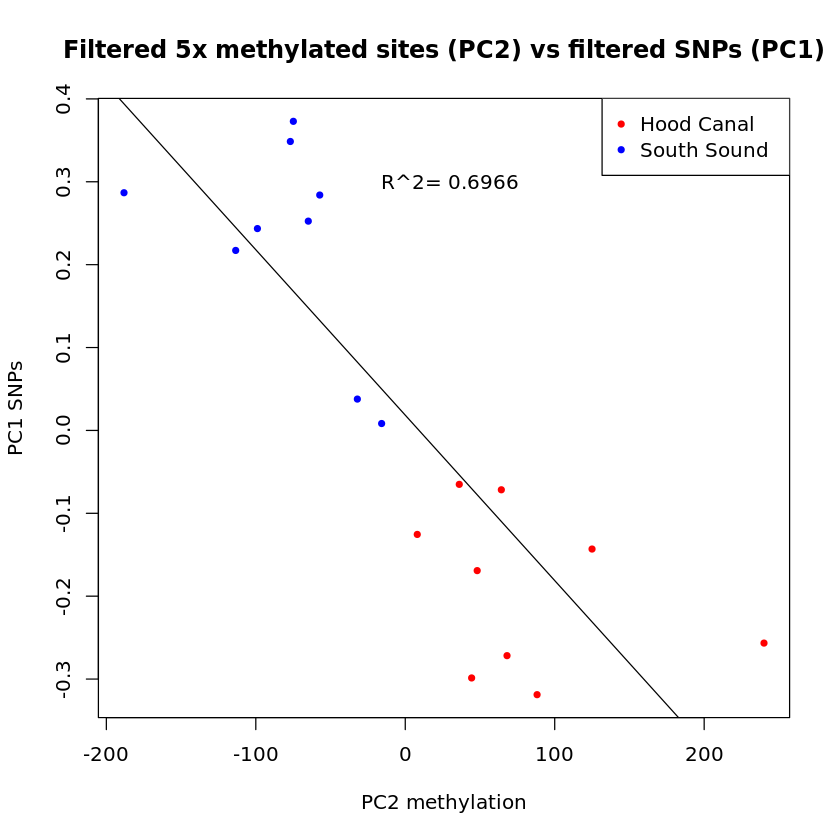

In [51]:
palette(c("red","blue"))
plot(ep$PC2,gen$PC1, pch=20,cex=1,xlab = "PC2 methylation", ylab = "PC1 SNPs",col=pop)
legend('topright', legend = levels(pop), col = c("red","blue"), cex = 1, pch = 20)
title("Filtered 5x methylated sites (PC2) vs filtered SNPs (PC1)")
summary(lm(gen$PC1~ep$PC2),)
R2 = round(summary(lm(gen$PC1~ep$PC2))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(gen$PC1~ep$PC2))
text(30,0.3,label=paste("R^2=",R2))


### DMLs

In [52]:
# Read in PC scores from epigenetics
ep <- read.table("../../paper-oly-mbdbs-gen/analyses/DMLs/PC-scores-DMLs.tab",
                 header=T, sep="\t",row.names = "sample")

Add sample names to PC score matrix

In [53]:
key = read.csv("../../paper-oly-mbdbs-gen/data/sample-key.csv",colClasses = c("character","character"))

In [54]:
samples = rownames(ep)
mapdf <- data.frame(old=key$MBD.FILENAME,new=key$SAMPLE)
rownames(ep) <- mapdf$new[match(samples,mapdf$old)]

In [55]:
ep

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hc1_2,-21.19546,25.55281133,-2.393988,5.591844,-4.896916,5.7768050,-4.128529439,5.57650316,-3.85203413,2.9231433,-0.7657338,4.4360063,-4.4771879,8.7981682,-17.2358795,0.9513672,-0.8182284,1.720716e-14
hc1_4,-26.17505,-9.85545673,-1.541117,-10.753280,8.005603,10.5847020,4.757230355,15.40325160,18.67185587,-4.8192035,-5.9023911,7.8951770,-2.6919361,-1.4044176,0.1171435,1.7351011,0.6697971,-1.264874e-14
hc2_15,-27.44207,-9.93683657,-1.977504,-4.045792,5.006737,-5.8281511,2.850467381,-16.40317370,-11.63784009,2.6068492,-9.5852781,15.2182081,-5.9624166,-2.7677115,0.5300971,6.4510671,1.0285543,-3.407431e-14
hc2_17,-26.78017,-8.88494286,1.616390,-14.824815,12.381558,7.3275247,5.852446442,3.36382822,-13.21606471,6.4167259,9.0711493,-12.5874488,7.4232076,4.0397190,-1.7964671,2.2744603,0.6141236,-2.575609e-14
hc3_1,-26.12304,-16.27841110,-2.015371,17.218358,-13.041637,2.0462520,-9.522806180,-0.53596836,3.84218496,-3.4599005,7.0833796,-4.4688671,4.5761089,-2.0321508,0.2791371,13.6215489,3.3053655,-1.901517e-14
hc3_5,-21.16350,23.73935592,-6.121172,3.914822,-3.441625,8.1002522,-1.098953210,8.29100230,-9.86400158,-3.0539660,0.1558437,1.3297368,-0.3305647,-9.0950639,16.0432798,-2.4147457,-0.3670638,-1.212225e-14
hc3_7,-30.92843,-18.85346769,-4.714808,8.145754,-5.213806,2.8217210,-3.423819013,-5.59599819,0.45624539,-0.0675766,0.2144223,-2.7433394,-3.7633990,1.6825471,-0.8846641,-19.4150542,-4.7047574,-1.759183e-14
hc3_10,-21.03439,21.19788276,-5.169549,-1.486571,6.959634,-6.8396262,6.314141625,-19.46781373,15.73262170,-1.9548204,1.6908580,-8.0732548,5.3095863,-0.9271814,0.8063040,-0.0301668,0.6053540,-1.797174e-15
hc3_11,-18.36727,0.85014804,10.747881,-2.272608,-2.600135,-31.3607291,0.487915045,13.80828266,-1.06536157,-2.3706240,-0.4811927,-2.0388925,-0.6142991,0.8118330,0.7590647,-1.2628954,-1.0649637,-8.077740e-15


In [57]:
#make sure ep and gen in same order
ep <- ep[mbdorder,]

In [60]:
cor.test( ~ ep$PC1 + gen$PC1,
         method = "pearson",
         conf.level = 0.95)
cor.test( ~ ep$PC1 + gen$PC1, 
         method = "spearman",
         continuity = FALSE,
         conf.level = 0.95)


	Pearson's product-moment correlation

data:  ep$PC1 and gen$PC1
t = 11.909, df = 16, p-value = 2.297e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8630461 0.9807661
sample estimates:
      cor 
0.9479559 



	Spearman's rank correlation rho

data:  ep$PC1 and gen$PC1
S = 106, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8906089 



Call:
lm(formula = gen$PC1 ~ ep$PC1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.144231 -0.054698 -0.008395  0.045627  0.155625 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0184082  0.0187047   0.984     0.34    
ep$PC1      0.0089519  0.0007517  11.909  2.3e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07936 on 16 degrees of freedom
Multiple R-squared:  0.8986,	Adjusted R-squared:  0.8923 
F-statistic: 141.8 on 1 and 16 DF,  p-value: 2.297e-09


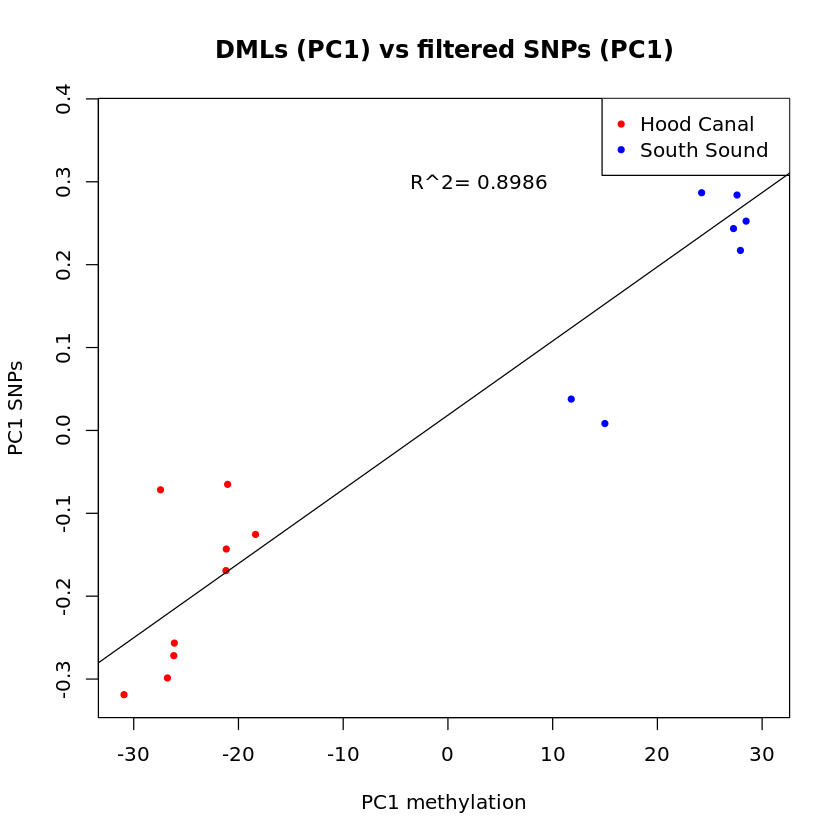

In [58]:
palette(c("red","blue"))
plot(ep$PC1,gen$PC1, pch=20,cex=1,xlab = "PC1 methylation", ylab = "PC1 SNPs",col=pop)
legend('topright', legend = levels(pop), col = c("red","blue"), cex = 1, pch = 20)
title("DMLs (PC1) vs filtered SNPs (PC1)")
summary(lm(gen$PC1~ep$PC1),)
R2 = round(summary(lm(gen$PC1~ep$PC1))$r.squared, 4)
#image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(gen$PC1~ep$PC1))
text(3,0.3,label=paste("R^2=",R2))

# CpG-SNPs  not updated
count all CpG-SNPs in genome using maf > 0.01 SNPs from full dataset, as well as GBS data  [site](https://www.bioconductor.org/packages/release/bioc/vignettes/ramwas/inst/doc/RW2_CpG_sets.html)  
see how many CpGs are in cis/trans sites
Do MACAU  
* correct for cis-SNPs, trans-SNPs

In [3]:
library(ramwas)
library(Biostrings)

ERROR: Error in library(ramwas): there is no package called 'ramwas'


In [2]:
# read in genome
genomeO = readDNAStringSet("../../Olurida_v081.fa")

In [3]:
genome = genomeO

In [4]:
head(genome)

  A DNAStringSet instance of length 6
     width seq                                              names               
[1] 116746 CCTTTGAAGGGGGTCTGGTCCTT...AATATTCGTAAGACAGTTATTT Contig0
[2]  87411 ACACCGCATTCACGGCGTTTTAC...GAAGGCTCGAACCATGATTTTT Contig1
[3] 139250 CGTATCGTACCAATGTGCCGTGA...ACCAAAAAAAGGCACAGATTTG Contig2
[4] 141657 CAAAATTCCTGGATCCGCCCCTG...GGGTAGATCATATGCCTGATGT Contig3
[5]  95692 CCTTCAACTAGGGACGACCCCCC...GTAAGGGGAGGGGGGGCCAAGT Contig4
[6] 130522 CATGAATTCATTATAAGCATGTT...AAATATGAAGCAGATATGTCTG Contig5

In [5]:
length(genome)

[1] 159429

In [29]:
js("vcftools --vcf ../analyses/2bRAD/Inputs/HCSS_Afilt32m70_01_pp90.vcf --counts --out ../analyses/2bRAD/MethGen/count_HCSS_Afilt32m70_01_pp90")

Warning message in system("vcftools --vcf ../analyses/2bRAD/Inputs/HCSS_Afilt32m70_01_pp90.vcf --counts --out ../analyses/2bRAD/MethGen/count_HCSS_Afilt32m70_01_pp90.txt"):
"error in running command"


In [7]:
names(genome)[1:10]

[1] "Contig0" "Contig1" "Contig2" "Contig3" "Contig4" "Contig5" "Contig6"
 [8] "Contig7" "Contig8" "Contig9"

In [37]:
chr = c()
pos=c()
r = readLines("../analyses/2bRAD/MethGen/count_HCSS_Afilt32m70_01_pp90.frq.count")
for (i in names(genome)){
    g = paste0(i,"\t")
     freq <- c(r[1],r[grep(g,r)])
    if(length(freq)>1){
            genome[i] = injectSNPsMAF(gensequence = unlist(genome[i]),frqcount = freq,
        MAF = 0.01)
    }

}


In [40]:
genome

  A DNAStringSet instance of length 159429
          width seq                                         names               
     [1] 116746 CCTTTGAAGGGGGTCTGGTC...TATTCGTAAGACAGTTATTT Contig0
     [2]  87411 ACACCGCATTCACGGCGTTT...AGGCTCGAACCATGATTTTT Contig1
     [3] 139250 CGTATCGTACCAATGTGCCG...CAAAAAAAGGCACAGATTTG Contig2
     [4] 141657 CAAAATTCCTGGATCCGCCC...GTAGATCATATGCCTGATGT Contig3
     [5]  95692 CCTTCAACTAGGGACGACCC...AAGGGGAGGGGGGGCCAAGT Contig4
     ...    ... ...
[159425]   1633 GGGGGGGGGGGTTTAGCCCA...AAAGAATCTCTTTCTCTTTT Contig696726
[159426]   2007 TGTCTGCAATTTGTATATAT...TATTTTTTTTTTTTGGTTTC Contig696755
[159427]   2014 GGGAGTCAAGGCTAACTCTG...CATATACGGTACCAATTTTT Contig696768
[159428]   7680 GTATATGCACGTGCAATTTC...GCAGTGCTCAGGGACGATGT Contig696807
[159429]   1455 ATATTGTAAATGTCCTCTAT...CGGGACAATAATTATAGATA Contig696856

In [10]:
# Find the CpGs
cpgset = getCpGsetALL(genome)

Processing 



In [ ]:
# Find the CpGs
cpgsetO = getCpGsetALL(genomeO)

In [50]:
length(cpgsetO)

[1] 159429

In [54]:
snpsCPG <- sum(lengths(cpgset))
snpsCPG

[1] 27332429

In [52]:
CPGO <- sum(lengths(cpgsetO))

In [53]:
CPGO

[1] 27331887

In [55]:
snpsCPG - CPGO

[1] 542

In [67]:
save(cpgset,cpgsetO,genome,genomeO,file="cpgset.RData")

In [2]:
load("cpgset.RData")

In [9]:
head(cpgset$'Contig0')

[1]  36  95 133 146 150 159

In [10]:
setdiff(cpgset[['Contig0']],cpgsetO$Contig0)

[1] 109103 109119

In [136]:
lappend <- function (lst, ...){
lst <- c(lst, list(...))
  return(lst)
}

lst=list()
for (c in names(cpgset)){
    d <- setdiff(cpgset[[c]],cpgsetO[[c]])
    lst <- c(lst,list(d))
}

In [135]:
lst

[[1]]
[1] 109103 109119

[[2]]
integer(0)

### 542 of SNPs create a new CpG

### Check how many SNPs are in CpG set and extract

In [26]:
library(bedr)



######################
#### bedr v1.0.7 ####
######################

checking binary availability...
  * Checking path for bedtools... PASS
    /tools/bedtools-2.29.0/bin/bedtools
  * Checking path for bedops... PASS
    /home/kes0132/miniconda3/envs/D/bin/bedops
  * Checking path for tabix... PASS
    /tools/tabix-0.2.7/tabix
tests and examples will be skipped on R CMD check if binaries are missing




In [27]:
x <- read.vcf("../analyses/2bRAD/Inputs/HCSS_Afilt32m70_01_pp90.vcf")
x <- vcf2bed(x, filename = NULL, header = FALSE, other = NULL, verbose = TRUE)

READING VCF
 * checking if file exists... PASS
 * Reading vcf header...
   Done
 * Reading vcf body...
   Done
 * Parse vcf header...
   Done
CONVERT VCF TO BED


In [28]:
head(x)

,chr,start,end
,<chr>,<dbl>,<dbl>
1,Contig0,109102,109103
2,Contig0,109118,109119
3,Contig0,109119,109120
4,Contig0,109122,109123
5,Contig1,42879,42880
6,Contig3,14913,14914


In [18]:
x[,2] <- x[,3]
head(x)

,V1,V2,V3
,<fct>,<int>,<int>
1,Contig0,109103,109103
2,Contig0,109119,109119
3,Contig0,109120,109120
4,Contig0,109123,109123
5,Contig1,42880,42880
6,Contig3,14914,14914


In [19]:
dim(x)

[1] 5269    3

In [20]:
write.table(x,"../analyses/2bRAD/Inputs/HCSS_Afilt32m70_01_pp90.BED",row.names = F,quote = F,col.names = F,sep="\t")

In [12]:
contigs <- names(cpgset)
radcpgSnps <- data.frame(chr=character(),
                 start=double(), 
                 end=double(), 
                 stringsAsFactors=FALSE)
for(row in 1:nrow(x)){
    c <- x[row,"chr"]
    if(c %in% contigs){
        snps <- cpgset[[c]]
        if(x[row,"end"] %in% snps){
            radcpgSnps <- rbind(radcpgSnps,x[row,])
        }
    }
}

In [14]:
dim(radcpgSnps)

[1] 651   3

## 651 of our 5269 SNPs are CpG-SNPs (12.4%), 266 CpG-SNPs (40.9%) within 350bp of a methylated site (5x) vs 1591 (34.5%) of non CpG-SNPs 

In [19]:
radcpgSnps$start <- radcpgSnps$end
write.table(radcpgSnps,file="../analyses/2bRAD/MethGen/cpgsnps.bed",quote = F, row.names = F,sep = "\t",col.names = F)

In [21]:
# bed file with non-CpG-SNPs
js("bedtools subtract -a ../analyses/2bRAD/Inputs/HCSS_Afilt32m70_01_pp90.BED -b ../analyses/2bRAD/MethGen/cpgsnps.bed  >  ../analyses/2bRAD/Inputs/non-cpgsnps.bed")
js("wc -l ../analyses/2bRAD/Inputs/non-cpgsnps.bed")


4618 ../analyses/2bRAD/Inputs/non-cpgsnps.bed


In [2]:
# how many Cpg-snps are within 350bp of a methylated site?
js("bedtools window -w 350 -u -b ../analyses/methylation-characteristics/all_methylated_5x.bed -a ../analyses/2bRAD/MethGen/cpgsnps.bed  >  ../analyses/2bRAD/MethGen/meth-cpgsnp-350.bed")
js("wc -l ../analyses/2bRAD/MethGen/meth-cpgsnp-350.bed")


266 ../analyses/2bRAD/MethGen/meth-cpgsnp-350.bed


In [52]:
# how many CpG-SNPs within 350bp of a CpG
js("bedtools window -w 350 -u -b ../genome-features/Olurida_v081_CG-motif.gff -a ../analyses/2bRAD/MethGen/cpgsnps.bed  >  ../analyses/2bRAD/MethGen/allCpG-cpgsnp-350.bed")
js("wc -l ../analyses/2bRAD/MethGen/allCpG-cpgsnp-350.bed")



650 ../analyses/2bRAD/MethGen/allCpG-cpgsnp-350.bed


In [53]:
# how many non cpg-SNPs near meth
js("bedtools window -w 350 -u -b ../analyses/methylation-characteristics/all_methylated_5x.bed -a ../analyses/2bRAD/Inputs/non-cpgsnps.bed  >  ../analyses/2bRAD/MethGen/meth-nonCpGsnp-350.bed")
js("wc -l ../analyses/2bRAD/MethGen/meth-nonCpGsnp-350.bed")


1591 ../analyses/2bRAD/MethGen/meth-nonCpGsnp-350.bed


In [54]:
# how many non CpG-SNPs near cpg
js("bedtools window -w 350 -u -b ../genome-features/Olurida_v081_CG-motif.gff -a ../analyses/2bRAD/Inputs/non-cpgsnps.bed  >  ../analyses/2bRAD/MethGen/allCpG-nonCpGsnp-350.bed")
js("wc -l ../analyses/2bRAD/MethGen/allCpG-nonCpGsnp-350.bed")


4609 ../analyses/2bRAD/MethGen/allCpG-nonCpGsnp-350.bed


#### Is methylation associated with CpG-SNP status?

In [55]:
cm <- 266
cnm <- 650-cm
ncm <- 1591
ncnm <- 4609-1591

In [56]:
mat <- matrix(c(cm,cnm,ncm,ncnm),ncol=2)
dimnames(mat) <- list(c("meth","nonmeth"),c("cpg","non-cpg"))
mat

,cpg,non-cpg
meth,266,1591
nonmeth,384,3018


In [57]:
test <- chisq.test(mat)
test


	Pearson's Chi-squared test with Yates' continuity correction

data:  mat
X-squared = 9.9482, df = 1, p-value = 0.00161


In [8]:
test$expected

,cpg,non-cpg
meth,229.4377,1627.562
nonmeth,421.5623,2990.438


In [59]:
# %cpg-snps with meth site
cm/(cm+cnm) *100

[1] 40.92308

In [60]:
# % non cpg with meth site
ncm/(ncm+ncnm) *100

[1] 34.51942

# CpG-SNPs and DMLs

In [2]:
# how many CpG-SNPs are near a dml
js("bedtools window -w 350 -u -a ../analyses/2bRAD/MethGen/cpgsnps.bed -b ../analyses/DMLs/dml25_forIGV.bed > ../analyses/2bRAD/MethGen/cpgsnps-DMLs-350bp.bed")
js("wc -l ../analyses/2bRAD/MethGen/cpgsnps-DMLs-350bp.bed")


6 ../analyses/2bRAD/MethGen/cpgsnps-DMLs-350bp.bed


In [3]:
# how many all SNPs are near a dml
js("bedtools window -w 350 -u -a ../analyses/2bRAD/Inputs/HCSS_Afilt32m70_01_pp90.BED -b ../analyses/DMLs/dml25_forIGV.bed > ../analyses/2bRAD/MethGen/Allsnps-DMLs-350bp.bed")
js("wc -l ../analyses/2bRAD/MethGen/Allsnps-DMLs-350bp.bed")




26 ../analyses/2bRAD/MethGen/Allsnps-DMLs-350bp.bed


In [6]:
cm <- 6
cnm <- 650-66
ncm <- 20
ncnm <- 5269-26

In [7]:
mat <- matrix(c(cm,cnm,ncm,ncnm),ncol=2)
dimnames(mat) <- list(c("meth","nonmeth"),c("cpg","non-cpg"))
mat

,cpg,non-cpg
meth,6,20
nonmeth,584,5243


In [9]:
test <- fisher.test(mat)
test


	Fisher's Exact Test for Count Data

data:  mat
p-value = 0.04086
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.8812717 6.9879996
sample estimates:
odds ratio 
  2.692662 


In [4]:
6/651

[1] 0.00921659

In [13]:
20/(5269-651)

[1] 0.004330879

In [11]:
# how many dmls are near a CpG-SNP
js("bedtools window -w 350 -u -b ../analyses/2bRAD/MethGen/cpgsnps.bed -a ../analyses/DMLs/dml25_forIGV.bed > ../analyses/2bRAD/MethGen/DMLs-by-cpgsnps-350bp.bed")
js("wc -l ../analyses/2bRAD/MethGen/DMLs-by-cpgsnps-350bp.bed")


10 ../analyses/2bRAD/MethGen/DMLs-by-cpgsnps-350bp.bed


In [10]:
js("wc -l ../analyses/DMLs/dml25_forIGV.bed")

3963 ../analyses/DMLs/dml25_forIGV.bed


In [12]:
# how many dmls are near all snps
js("bedtools window -w 350 -u -b ../analyses/2bRAD/Inputs/HCSS_Afilt32m70_01_pp90.BED -a ../analyses/DMLs/dml25_forIGV.bed > ../analyses/2bRAD/MethGen/DMLs-by-allsnps-350bp.bed")
js("wc -l ../analyses/2bRAD/MethGen/DMLs-by-allsnps-350bp.bed")




23 ../analyses/2bRAD/MethGen/DMLs-by-allsnps-350bp.bed


###### 

# CpG-SNPs with GBS SNPs added

In [11]:
js("vcftools --vcf ../data/Oly-ref-c90-t10-m70-mac4.recode.vcf --counts --out ../analyses/2bRAD/MethGen/Oly-ref-c90-t10-m70-mac4")

In [12]:
genomeG <- genome

In [ ]:
chr = c()
pos=c()
r = readLines("../analyses/2bRAD/MethGen/Oly-ref-c90-t10-m70-mac4.frq.count")
for (i in names(genomeG)){
    g = paste0(i,"\t")
     freq <- c(r[1],r[grep(g,r)])
    if(length(freq)>1){
            genomeG[i] = injectSNPsMAF(gensequence = unlist(genomeG[i]),frqcount = freq,
        MAF = 0.01)
    }

}


In [16]:
genomeG

  A DNAStringSet instance of length 159429
          width seq                                         names               
     [1] 116746 CCTTTGAAGGGGGTCTGGTC...TATTCGTAAGACAGTTATTT Contig0
     [2]  87411 ACACCGCATTCACGGCGTTT...AGGCTCGAACCATGATTTTT Contig1
     [3] 139250 CGTATCGTACCAATGTGCCG...CAAAAAAAGGCACAGATTTG Contig2
     [4] 141657 CAAAATTCCTGGATCCGCCC...GTAGATCATATGCCTGATGT Contig3
     [5]  95692 CCTTCAACTAGGGACGACCC...AAGGGGAGGGGGGGCCAAGT Contig4
     ...    ... ...
[159425]   1633 GGGGGGGGGGGTTTAGCCCA...AAAGAATCTCTTTCTCTTTT Contig696726
[159426]   2007 TGTCTGCAATTTGTATATAT...TATTTTTTTTTTTTGGTTTC Contig696755
[159427]   2014 GGGAGTCAAGGCTAACTCTG...CATATACGGTACCAATTTTT Contig696768
[159428]   7680 GTATATGCACGTGCAATTTC...GCAGTGCTCAGGGACGATGT Contig696807
[159429]   1455 ATATTGTAAATGTCCTCTAT...CGGGACAATAATTATAGATA Contig696856

In [ ]:
# Find the CpGs
cpgsetG = getCpGsetALL(genomeG)

In [17]:
snpsCPGg <- sum(lengths(cpgsetG))
snpsCPGg

[1] 27338139

In [18]:
snpsCPG <- sum(lengths(cpgset))
snpsCPG

[1] 27332429

In [19]:
CPGO <- sum(lengths(cpgsetO))

In [20]:
snpsCPGg - snpsCPG

[1] 5710

In [21]:
snpsCPGg - CPGO

[1] 6252

In [22]:
snpsCPG - CPGO

[1] 542

In [23]:
save(cpgset,cpgsetO,cpgsetG,genomeG,genome,genomeO,file="cpgset.RData")

In [35]:
load("cpgset.RData")

In [36]:
head(cpgsetG$'Contig0')

[1]  36  95 133 146 150 159

In [25]:
setdiff(cpgsetG[['Contig0']],cpgsetO$Contig0)

[1] 109103 109119

In [136]:
#dont run
lappend <- function (lst, ...){
lst <- c(lst, list(...))
  return(lst)
}

lst=list()
for (c in names(cpgset)){
    d <- setdiff(cpgset[[c]],cpgsetO[[c]])
    lst <- c(lst,list(d))
}

In [135]:
lst

[[1]]
[1] 109103 109119

[[2]]
integer(0)

### 6252 of SNPs create a new CpG

### Check how many SNPs are in CpG set and extract

In [1]:
library(bedr)



######################
#### bedr v1.0.7 ####
######################

checking binary availability...
  * Checking path for bedtools... PASS
    /tools/bedtools-2.30.0/bin/bedtools
  * Checking path for bedops... FAIL
  * Checking path for tabix... PASS
    /tools/tabix-0.2.7/tabix
tests and examples will be skipped on R CMD check if binaries are missing




In [2]:
x <- read.vcf("../analyses/2bRAD/Inputs/HCSS_Afilt32m70_01_pp90.vcf")
x <- vcf2bed(x, filename = NULL, header = FALSE, other = NULL, verbose = TRUE)

READING VCF
 * checking if file exists... PASS
 * Reading vcf header...
   Done
 * Reading vcf body...
   Done
 * Parse vcf header...
   Done
CONVERT VCF TO BED


In [3]:
y <- read.vcf("../data/Oly-ref-c90-t10-m70-mac4.recode.vcf")
y <- vcf2bed(y, filename = NULL, header = FALSE, other = NULL, verbose = TRUE)

READING VCF
 * checking if file exists... PASS
 * Reading vcf header...
   Done
 * Reading vcf body...
   Done
 * Parse vcf header...
   Done
CONVERT VCF TO BED


In [41]:
head(x)
dim(x)

,chr,start,end
,<chr>,<dbl>,<dbl>
1,Contig0,109103,109103
2,Contig0,109119,109119
3,Contig0,109120,109120
4,Contig0,109123,109123
5,Contig1,42880,42880
6,Contig3,14914,14914


[1] 5269    3

In [42]:
head(y)
dim(y)

,chr,start,end
,<chr>,<dbl>,<dbl>
1,Contig0,7285,7285
2,Contig0,34735,34735
3,Contig1,2414,2414
4,Contig1,2422,2422
5,Contig1,2431,2431
6,Contig1,2436,2436


[1] 58126     3

In [6]:
x[,2] <- x[,3]
head(x)

,chr,start,end
,<chr>,<dbl>,<dbl>
1,Contig0,109103,109103
2,Contig0,109119,109119
3,Contig0,109120,109120
4,Contig0,109123,109123
5,Contig1,42880,42880
6,Contig3,14914,14914


In [7]:
y[,2] <- y[,3]
head(y)

,chr,start,end
,<chr>,<dbl>,<dbl>
1,Contig0,7285,7285
2,Contig0,34735,34735
3,Contig1,2414,2414
4,Contig1,2422,2422
5,Contig1,2431,2431
6,Contig1,2436,2436


In [13]:
xy <- rbind(x,y)
xy.sort <- bedr.sort.region(xy,check.chr=FALSE)
dim(xy.sort)
head(xy.sort)

SORTING
VALIDATE REGIONS
 * Checking input type... PASS
   Input is in bed format
 * Check if index is a string... PASS
 * Check index pattern... PASS
 * Check for missing values... PASS
 * Check for larger start position... PASS.
 * Check if zero based... FAIL
   There are identical start and stop positions.
   This usually indicates 1 based point variants.
      chr  start    end
1 Contig0 109103 109103
2 Contig0 109119 109119
3 Contig0 109120 109120
4 Contig0 109123 109123
5 Contig1  42880  42880
6 Contig3  14914  14914


[1] 63395     3

,chr,start,end
,<chr>,<dbl>,<dbl>
5270,Contig0,7285,7285
5271,Contig0,34735,34735
1,Contig0,109103,109103
2,Contig0,109119,109119
3,Contig0,109120,109120
4,Contig0,109123,109123


In [17]:
is.merged <- is.merged.region(xy.sort,check.zero.based=F,check.chr = F)
is.merged

[1] FALSE

In [27]:
head(xy.sort[duplicated(xy.sort)| duplicated(xy.sort, fromLast = TRUE),])

,chr,start,end
,<chr>,<dbl>,<dbl>
4803,Contig139210,906,906
58367,Contig139210,906,906
4804,Contig139210,908,908
58368,Contig139210,908,908
275,Contig1607,8412,8412
8582,Contig1607,8412,8412


In [28]:
dim(xy.sort[duplicated(xy.sort),])

[1] 33  3

33 SNPS overlap between datasets, so remove them

In [32]:
xy.merge <- xy.sort[!duplicated(xy.sort),]
dim(xy.merge)

[1] 63362     3

In [33]:
write.table(xy.merge,"../analyses/2bRAD/Inputs/GBS_2bRAD_SNPs_maf01.BED",row.names = F,quote = F,col.names = F,sep="\t")

In [38]:
contigs <- names(cpgsetG)
radcpgSnps <- data.frame(chr=character(),
                 start=double(), 
                 end=double(), 
                 stringsAsFactors=FALSE)
for(row in 1:nrow(xy.merge)){
    c <- xy.merge[row,"chr"]
    if(c %in% contigs){
        snps <- cpgsetG[[c]]
        if(xy.merge[row,"end"] %in% snps){
            radcpgSnps <- rbind(radcpgSnps,xy.merge[row,])
        }
    }
}

In [39]:
dim(radcpgSnps)

[1] 7234    3

## 7234 of our 63,362 SNPs are CpG-SNPs (11.4%), 3601 CpG-SNPs (49.78% of all, 49.8 of near CpG)) within 350bp of a methylated site (5x) vs 22884 (40.78%, 40.83%) of non CpG-SNPs 

In [40]:
head(radcpgSnps)

,chr,start,end
,<chr>,<dbl>,<dbl>
1,Contig0,109103,109103
2,Contig0,109119,109119
5285,Contig1,4525,4525
5318,Contig10,44712,44712
5320,Contig10,44785,44785
5322,Contig10,44794,44794


In [43]:
radcpgSnps$start <- radcpgSnps$end
write.table(radcpgSnps,file="../analyses/2bRAD/MethGen/cpgsnps_GBS2b.bed",quote = F, row.names = F,sep = "\t",col.names = F)

In [46]:
# bed file with non-CpG-SNPs
js("bedtools subtract -a ../analyses/2bRAD/Inputs/GBS_2bRAD_SNPs_maf01.BED -b ../analyses/2bRAD/MethGen/cpgsnps_GBS2b.bed  >  ../analyses/2bRAD/Inputs/non-cpgsnps_GBS2b.bed")
js("wc -l ../analyses/2bRAD/Inputs/non-cpgsnps_GBS2b.bed")


56122 ../analyses/2bRAD/Inputs/non-cpgsnps_GBS2b.bed


In [47]:
# how many Cpg-snps are within 350bp of a methylated site?
js("bedtools window -w 350 -u -b ../analyses/methylation-characteristics/all_methylated_5x.bed -a ../analyses/2bRAD/MethGen/cpgsnps_GBS2b.bed  >  ../analyses/2bRAD/MethGen/meth-cpgsnp-350_GBS2b.bed")
js("wc -l ../analyses/2bRAD/MethGen/meth-cpgsnp-350_GBS2b.bed")


3601 ../analyses/2bRAD/MethGen/meth-cpgsnp-350_GBS2b.bed


In [49]:
# how many non-Cpg-snps are within 350bp of a methylated site?
js("bedtools window -w 350 -u -b ../analyses/methylation-characteristics/all_methylated_5x.bed -a ../analyses/2bRAD/Inputs/non-cpgsnps_GBS2b.bed  >  ../analyses/2bRAD/MethGen/meth-non-cpgsnp-350_GBS2b.bed")
js("wc -l ../analyses/2bRAD/MethGen/meth-non-cpgsnp-350_GBS2b.bed")


22884 ../analyses/2bRAD/MethGen/meth-non-cpgsnp-350_GBS2b.bed


In [50]:
# how many CpG-SNPs within 350bp of a CpG
js("bedtools window -w 350 -u -b ../genome-features/Olurida_v081_CG-motif.gff -a ../analyses/2bRAD/MethGen/cpgsnps_GBS2b.bed  >  ../analyses/2bRAD/MethGen/allCpG-cpgsnp-350_GBS2b.bed")
js("wc -l ../analyses/2bRAD/MethGen/allCpG-cpgsnp-350_GBS2b.bed")



7231 ../analyses/2bRAD/MethGen/allCpG-cpgsnp-350_GBS2b.bed


In [51]:
# how many non-CpG SNPs near cpg
js("bedtools window -w 350 -u -b ../genome-features/Olurida_v081_CG-motif.gff -a ../analyses/2bRAD/Inputs/non-cpgsnps_GBS2b.bed  >  ../analyses/2bRAD/MethGen/allCpG-nonCpGsnp-350_GBS2b.bed")
js("wc -l ../analyses/2bRAD/MethGen/allCpG-nonCpGsnp-350_GBS2b.bed")


56049 ../analyses/2bRAD/MethGen/allCpG-nonCpGsnp-350_GBS2b.bed


#### Is methylation associated with CpG-SNP status?

In [61]:
cm <- 3601
cnm <- 7231-cm
ncm <- 22884
ncnm <- 56049-ncm

In [62]:
mat <- matrix(c(cm,cnm,ncm,ncnm),ncol=2)
dimnames(mat) <- list(c("meth","nonmeth"),c("cpg","non-cpg"))
mat

,cpg,non-cpg
meth,3601,22884
nonmeth,3630,33165


In [63]:
test <- chisq.test(mat)
test


	Pearson's Chi-squared test with Yates' continuity correction

data:  mat
X-squared = 211.43, df = 1, p-value < 2.2e-16


In [64]:
test$expected

,cpg,non-cpg
meth,3026.439,23458.56
nonmeth,4204.561,32590.44


In [65]:
# %cpg-snps with meth site
cm/(cm+cnm) *100

[1] 49.79947

In [66]:
# % non cpg with meth site
ncm/(ncm+ncnm) *100

[1] 40.82856

# TsTv ratio (mutation rate bias)

TsTv in all SNPs

In [2]:
%%bash
#change to python kernel
vcftools --vcf ../analyses/2bRAD/Inputs/HCSS_Afilt32m70_01_pp90.vcf --exclude-bed ../analyses/2bRAD/MethGen/cpgsnps.bed --TsTv-summary --out ../analyses/2bRAD/MethGen/nonCpGsnps


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ../analyses/2bRAD/Inputs/HCSS_Afilt32m70_01_pp90.vcf
	--out ../analyses/2bRAD/MethGen/nonCpGsnps
	--TsTv-summary
	--exclude-bed ../analyses/2bRAD/MethGen/cpgsnps.bed

After filtering, kept 114 out of 114 Individuals
Outputting Ts/Tv summary
	Read 651 BED file entries.
Ts/Tv ratio: 1.312
After filtering, kept 4619 out of a possible 5269 Sites
Run Time = 1.00 seconds


In [2]:
%%bash
#change to python kernel, cpgsnps
vcftools --vcf ../analyses/2bRAD/Inputs/HCSS_Afilt32m70_01_pp90.vcf --bed ../analyses/2bRAD/MethGen/cpgsnps.bed --TsTv-summary --out ../analyses/2bRAD/MethGen/cpgsnp


VCFtools - 0.1.17
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ../analyses/2bRAD/Inputs/HCSS_Afilt32m70_01_pp90.vcf
	--out ../analyses/2bRAD/MethGen/cpgsnp
	--TsTv-summary
	--bed ../analyses/2bRAD/MethGen/cpgsnps.bed

After filtering, kept 114 out of 114 Individuals
Outputting Ts/Tv summary
	Read 651 BED file entries.
Ts/Tv ratio: 2.672
After filtering, kept 650 out of a possible 5269 Sites
Run Time = 0.00 seconds


In [5]:
#change back to R kernel
nt <- read.table("../analyses/2bRAD/MethGen/nonCpGsnps.TsTv.summary",header = T)
total = nt[7,"COUNT"] + nt[8,"COUNT"]
nt <- nt %>% mutate(prop=COUNT/total)
nt

MODEL,COUNT,prop
<fct>,<int>,<dbl>
AC,487,0.10543408
AG,1487,0.32193115
AT,720,0.15587790
CG,200,0.04329942
CT,1134,0.24550769
GT,591,0.12794977
Ts,2621,0.56743884
Tv,1998,0.43256116


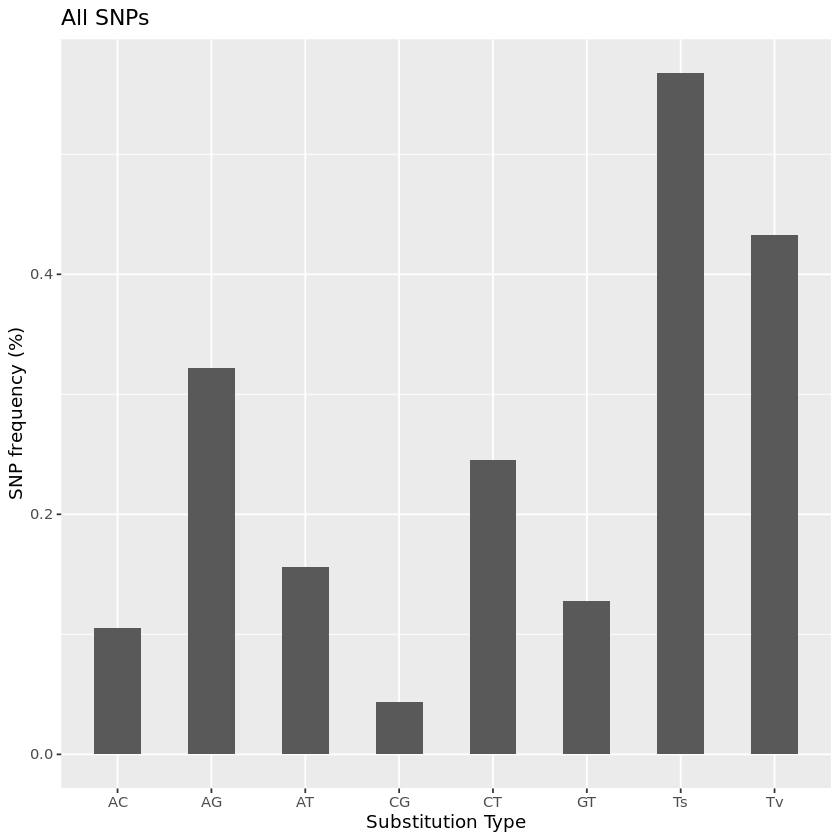

In [10]:
g <- ggplot(nt,aes(x = MODEL,y=prop)) + 
            geom_bar(stat="identity", width = 0.5)  + 
            xlab("Substitution Type") + ylab("SNP frequency (%)") +
        ggtitle("All SNPs")

g
#ggsave("TsTv/TsTv_Am4s2n.png", plot = g,device = "png")

In [6]:
#change back to R kernel
t <- read.table("../analyses/2bRAD/MethGen/cpgsnp.TsTv.summary",header = T)
total = t[7,"COUNT"] + t[8,"COUNT"]
t <- t %>% mutate(prop=COUNT/total)
t

MODEL,COUNT,prop
<fct>,<int>,<dbl>
AC,114,0.17538462
AG,0,0.00000000
AT,0,0.00000000
CG,63,0.09692308
CT,473,0.72769231
GT,0,0.00000000
Ts,473,0.72769231
Tv,177,0.27230769


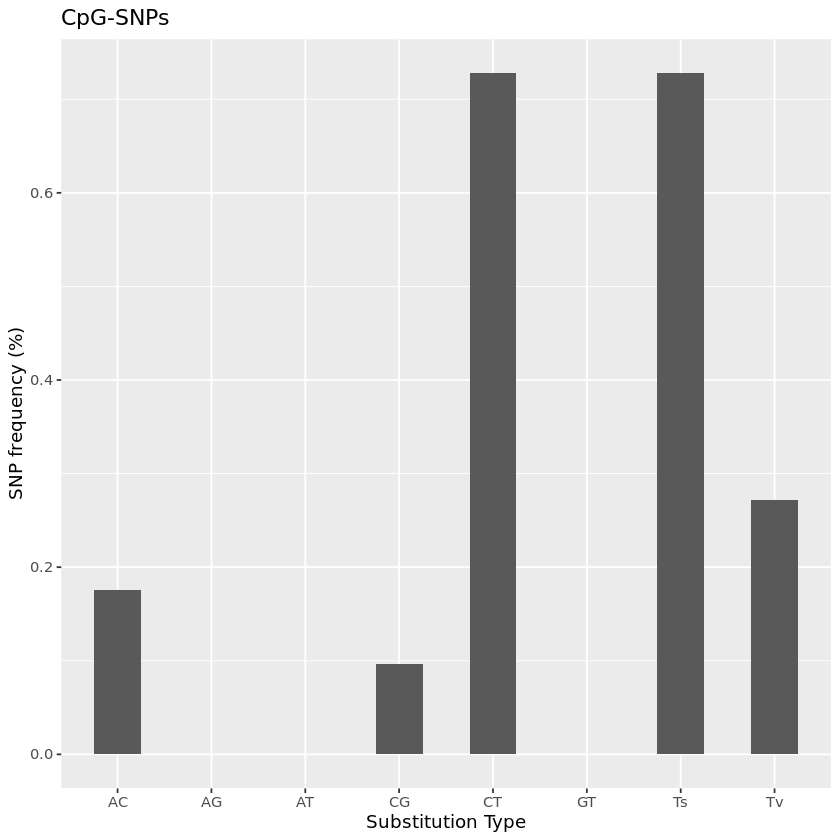

In [7]:
g <- ggplot(t,aes(x = MODEL,y=prop)) + 
            geom_bar(stat="identity", width = 0.5)  + 
            xlab("Substitution Type") + ylab("SNP frequency (%)") +
       ggtitle("CpG-SNPs")

g
#ggsave("TsTv/TsTv_Am4s2n.png", plot = g,device = "png")

In [11]:
nct <- nt$COUNT[5]
ntotal <- nt[7,"COUNT"] + nt[8,"COUNT"]
nother <- ntotal - nct

ct <- t$COUNT[5]
total <- t[7,"COUNT"] + t[8,"COUNT"]
other <- total - ct

In [12]:
mat <- matrix(c(ct,other,nct,nother),ncol=2)
dimnames(mat) <- list(c("CT","nonCT"),c("cpg","non-cpg"))
mat

,cpg,non-cpg
CT,473,1134
nonCT,177,3485


In [13]:
test <- chisq.test(mat)
test


	Pearson's Chi-squared test with Yates' continuity correction

data:  mat
X-squared = 622.73, df = 1, p-value < 2.2e-16
